# Heart Disease Prediction.

## Project ID: PRCP-1016-HeartDieseasePred (Heart Disease Prediction)

## Project Team ID: PTID-CDS-SEP20-1007

# PRESENTED By : Dr. Suriya Begum

# Project Summary
## Problem Definition :

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Goal :
To predict the Binary Class "heart_disease_present" , which represents whether or not a patient has heart disease:
- 0 represents no heart disease present
- 1 represents heart disease present

## Features : 

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a Subject Matter Expert (someone who knows about the dataset).

Create data dictionary :

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Analysis:

- The data obtained is cleaned, supervised and categorical data. The Dependent Variable is 'heart_disease_present', the raw  data obtained was having 180 rows and 15 columns. To analyze this, Correlation between independent features and even with    respect to target variable is used, along with this Pandas_Profiling is done to the entire dataset to understand each and    every feature. Label Encoding and Scaling of the dataset has been done. The features has been finalized based on Correlation between variables and feature_importances of the model.
- After Exploratory Data Analysis, the finalized features are 'slope_of_peak_exercise_st_segment' , 'thal' , 'resting_blood_pressure' ,  'chest_pain_type' ,  'num_major_vessels' ,  'serum_cholesterol_mg_per_dl',  'oldpeak_eq_st_depression' ,  'sex' ,  'age' ,  'max_heart_rate_achieved' ,  'exercise_induced_angina'.
- The algorithms used are Logistic Regression, Random Forest Classifier. K-Fold cross_validation technique is also applied to the model.

## Summary :

The main aim of doing the project is to predict whether or not a patient has heart disease. The key steps followed during analysis are :
- Importing the raw data provided.
- classified the features as independent and target variable.
- Exploratory Data Analysis is carried out.
- Pandas_Profiling is done to understand each feature of the dataset.
- Label Encoding is done for the ordinal variables of the dataset.
- For training and testing the algorithms used are : Logistic Regression  , Random Forest , Artificial Neural Network Classifier , XGBoost Classifier , Support Vector Machine Classifier ,  and K Neighbors Classifier . Also checked which Algorithm provides the better accuracy_score for the model. K-Fold cross_validation Technique has also been applied.

## Results :

The following accuracy_scores have been obtained from SIX(6)different Algorithms :
Then, SIX(6) models were trained and tested with maximum scores which is as shown below :

- Random Forest Classifier: 100%
- Logistic Regression: 83%
- Artificial Neural Network Classifier: 83 %
- XGBoost Classifier: 83%
- Support Vector Machine Classifier: 79.56 %
- K Neighbors Classifier: 71.69%

#### Random Forest Classifier with 10 k_fold cross_validation, the accuracy_score is 100%. Along with this, the precision, recall , f1_score are also  100%.


### Import  Required Libraries

In [348]:
# IMPORTING THE REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

pd.options.display.max_columns=20
pd.options.display.max_rows=200

import warnings
warnings.filterwarnings('ignore')


### Importing the First Data File

In [3]:
heart_disease=pd.read_csv('values.csv')
heart_disease.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
heart_disease.shape

(180, 14)

 The dataset has a total of 180 rows and 14 features 

### Reading the Second Dataset

In [5]:
heart_disease_target=pd.read_csv('labels.csv')
heart_disease_target.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


The dataset has a total of 180 rows and 2 features,along with one target value "heart_disease_present" which we wish to find.

In [6]:
heart_disease_target.shape

(180, 2)

Merging the two Datasets , using the key "patient_id"

In [8]:
heart_disease_1=heart_disease.merge(heart_disease_target,left_on='patient_id',right_on='patient_id')
heart_disease_1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


The dataset has a total of 180 rows and 15 features, after merging

In [10]:
heart_disease_1.shape

(180, 15)

### Make a copy()

In [11]:
heart_disease_2 = heart_disease_1.copy()
heart_disease_2.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [200]:
heart_disease_2.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

## Exploratory Data Analysis

### Pandas Profiling

In [357]:
from pandas_profiling import ProfileReport

In [359]:
profile=ProfileReport(heart_disease_2, title="Profiling Report",explorative =True)

In [361]:
profile.to_widgets()


In [364]:
profile.to_file('Heart Disease Prediction.html')

In [14]:
# To check the shape of the dataset.
heart_disease_2.shape

(180, 15)

In [15]:
# To Check if there are any missing values in the dataset.
heart_disease_2.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [16]:
heart_disease_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

Categorical Features and Numerical Features , unique values

In [341]:
categorical_val = []
continous_val = []
for column in heart_disease_2.columns:
    print('==============================')
    print(f"{column} : {heart_disease_2[column].unique()}")
    if len(heart_disease_2[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

slope_of_peak_exercise_st_segment : [1 2 3]
thal : [1 2 0]
resting_blood_pressure : [128 110 125 152 178 130 150 170 120 140 138 144 136 160 108 106 156 180
 112 122 124 135 105 115 126 172 145 118 134 100 155 132 102  94 117 142]
chest_pain_type : [2 3 4 1]
num_major_vessels : [0 3 2 1]
resting_ekg_results : [2 0 1]
serum_cholesterol_mg_per_dl : [308 214 304 223 270 180 258 276 326 219 302 226 335 236 231 200 234 253
 204 319 233 228 245 211 303 205 185 175 225 203 325 230 222 126 209 269
 255 243 252 265 417 267 261 149 281 311 315 330 256 239 295 197 564 305
 283 160 254 282 322 250 188 220 199 215 218 196 266 229 259 268 177 168
 262 271 299 293 141 277 212 321 294 313 232 289 213 274 263 244 298 172
 353 210 192 246 286 360 174 227 248 224 300 235 217 193 167 216 195 309
 273 198 290 275 206 164 207 249 327 201]
oldpeak_eq_st_depression : [0.  1.6 4.2 2.6 0.6 3.4 0.4 0.2 3.8 0.9 1.4 0.1 0.3 2.3 1.5 3.  2.  1.
 3.1 2.5 0.8 2.4 1.8 1.9 2.8 1.2 0.5 2.2 1.3 1.1 0.7 3.2 5.6 6.2]
sex : 

In [201]:
# To View Statistics of the dataset
pd.set_option("display.float", "{:.2f}".format)
heart_disease_2.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00
mean,1.55,1.37,131.31,3.16,0.69,1.05,249.21,1.01,0.69,54.81,149.48,0.32,0.44
std,0.62,0.57,17.01,0.94,0.97,1.00,52.72,1.12,0.46,9.33,22.06,0.47,0.50
min,1.00,0.00,94.00,1.00,0.00,0.00,126.00,0.00,0.00,29.00,96.00,0.00,0.00
25%,1.00,1.00,120.00,3.00,0.00,0.00,213.75,0.00,0.00,48.00,132.00,0.00,0.00
50%,1.00,1.00,130.00,3.00,0.00,2.00,245.50,0.80,1.00,55.00,152.00,0.00,0.00
75%,2.00,2.00,140.00,4.00,1.00,2.00,281.25,1.60,1.00,62.00,166.25,1.00,1.00
max,3.00,2.00,180.00,4.00,3.00,2.00,564.00,6.20,1.00,77.00,202.00,1.00,1.00


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.



### Understanding the data

In [18]:
# To Check the  Correlation between the features with respect to the Target variable "heart_disease_present"
heart_disease_2.corr().heart_disease_present.sort_values(ascending=False)

heart_disease_present                   1.000000
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
max_heart_rate_achieved                -0.375352
Name: heart_disease_present, dtype: float64

Taking a look at the correlation matrix above, it's easy to see that a few features( in this case only one feature is negatively corelated) have negative correlation with the target value while some have positive. 

### Visualization of Data

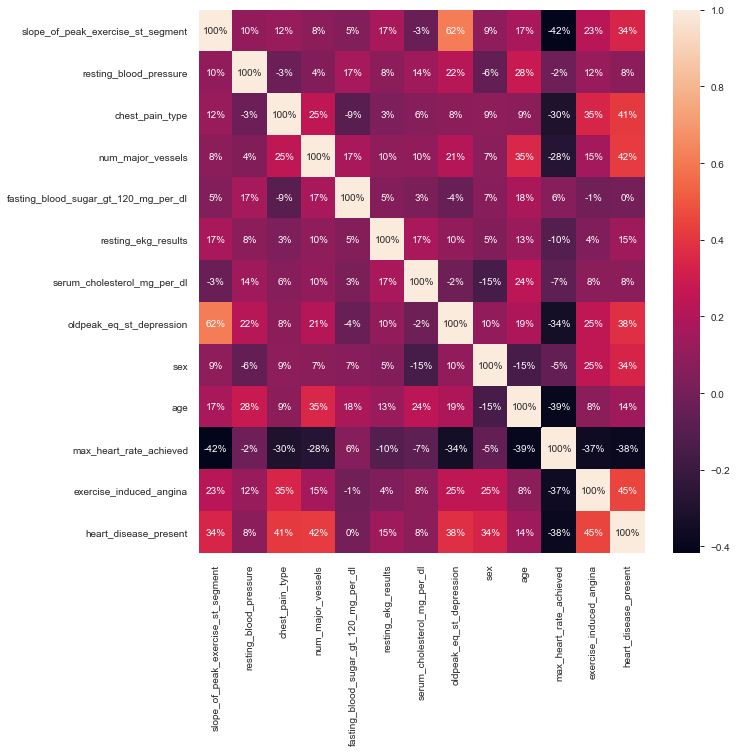

In [19]:
# To visualize the Correlation table for understanding its percentage coefficients.
plt.figure(figsize=(10,10))
sb.heatmap(heart_disease_2.corr(),annot=True,fmt='.0%')

fasting_blood_sugar_gt_120_mg_per_dl , resting_blood_pressure and serum_cholesterol_mg_per_dl  are the lowest correlated with the target variable.
All other variables have a significant correlation with the Target Variable(heart_disease_present).

### Pair Plot

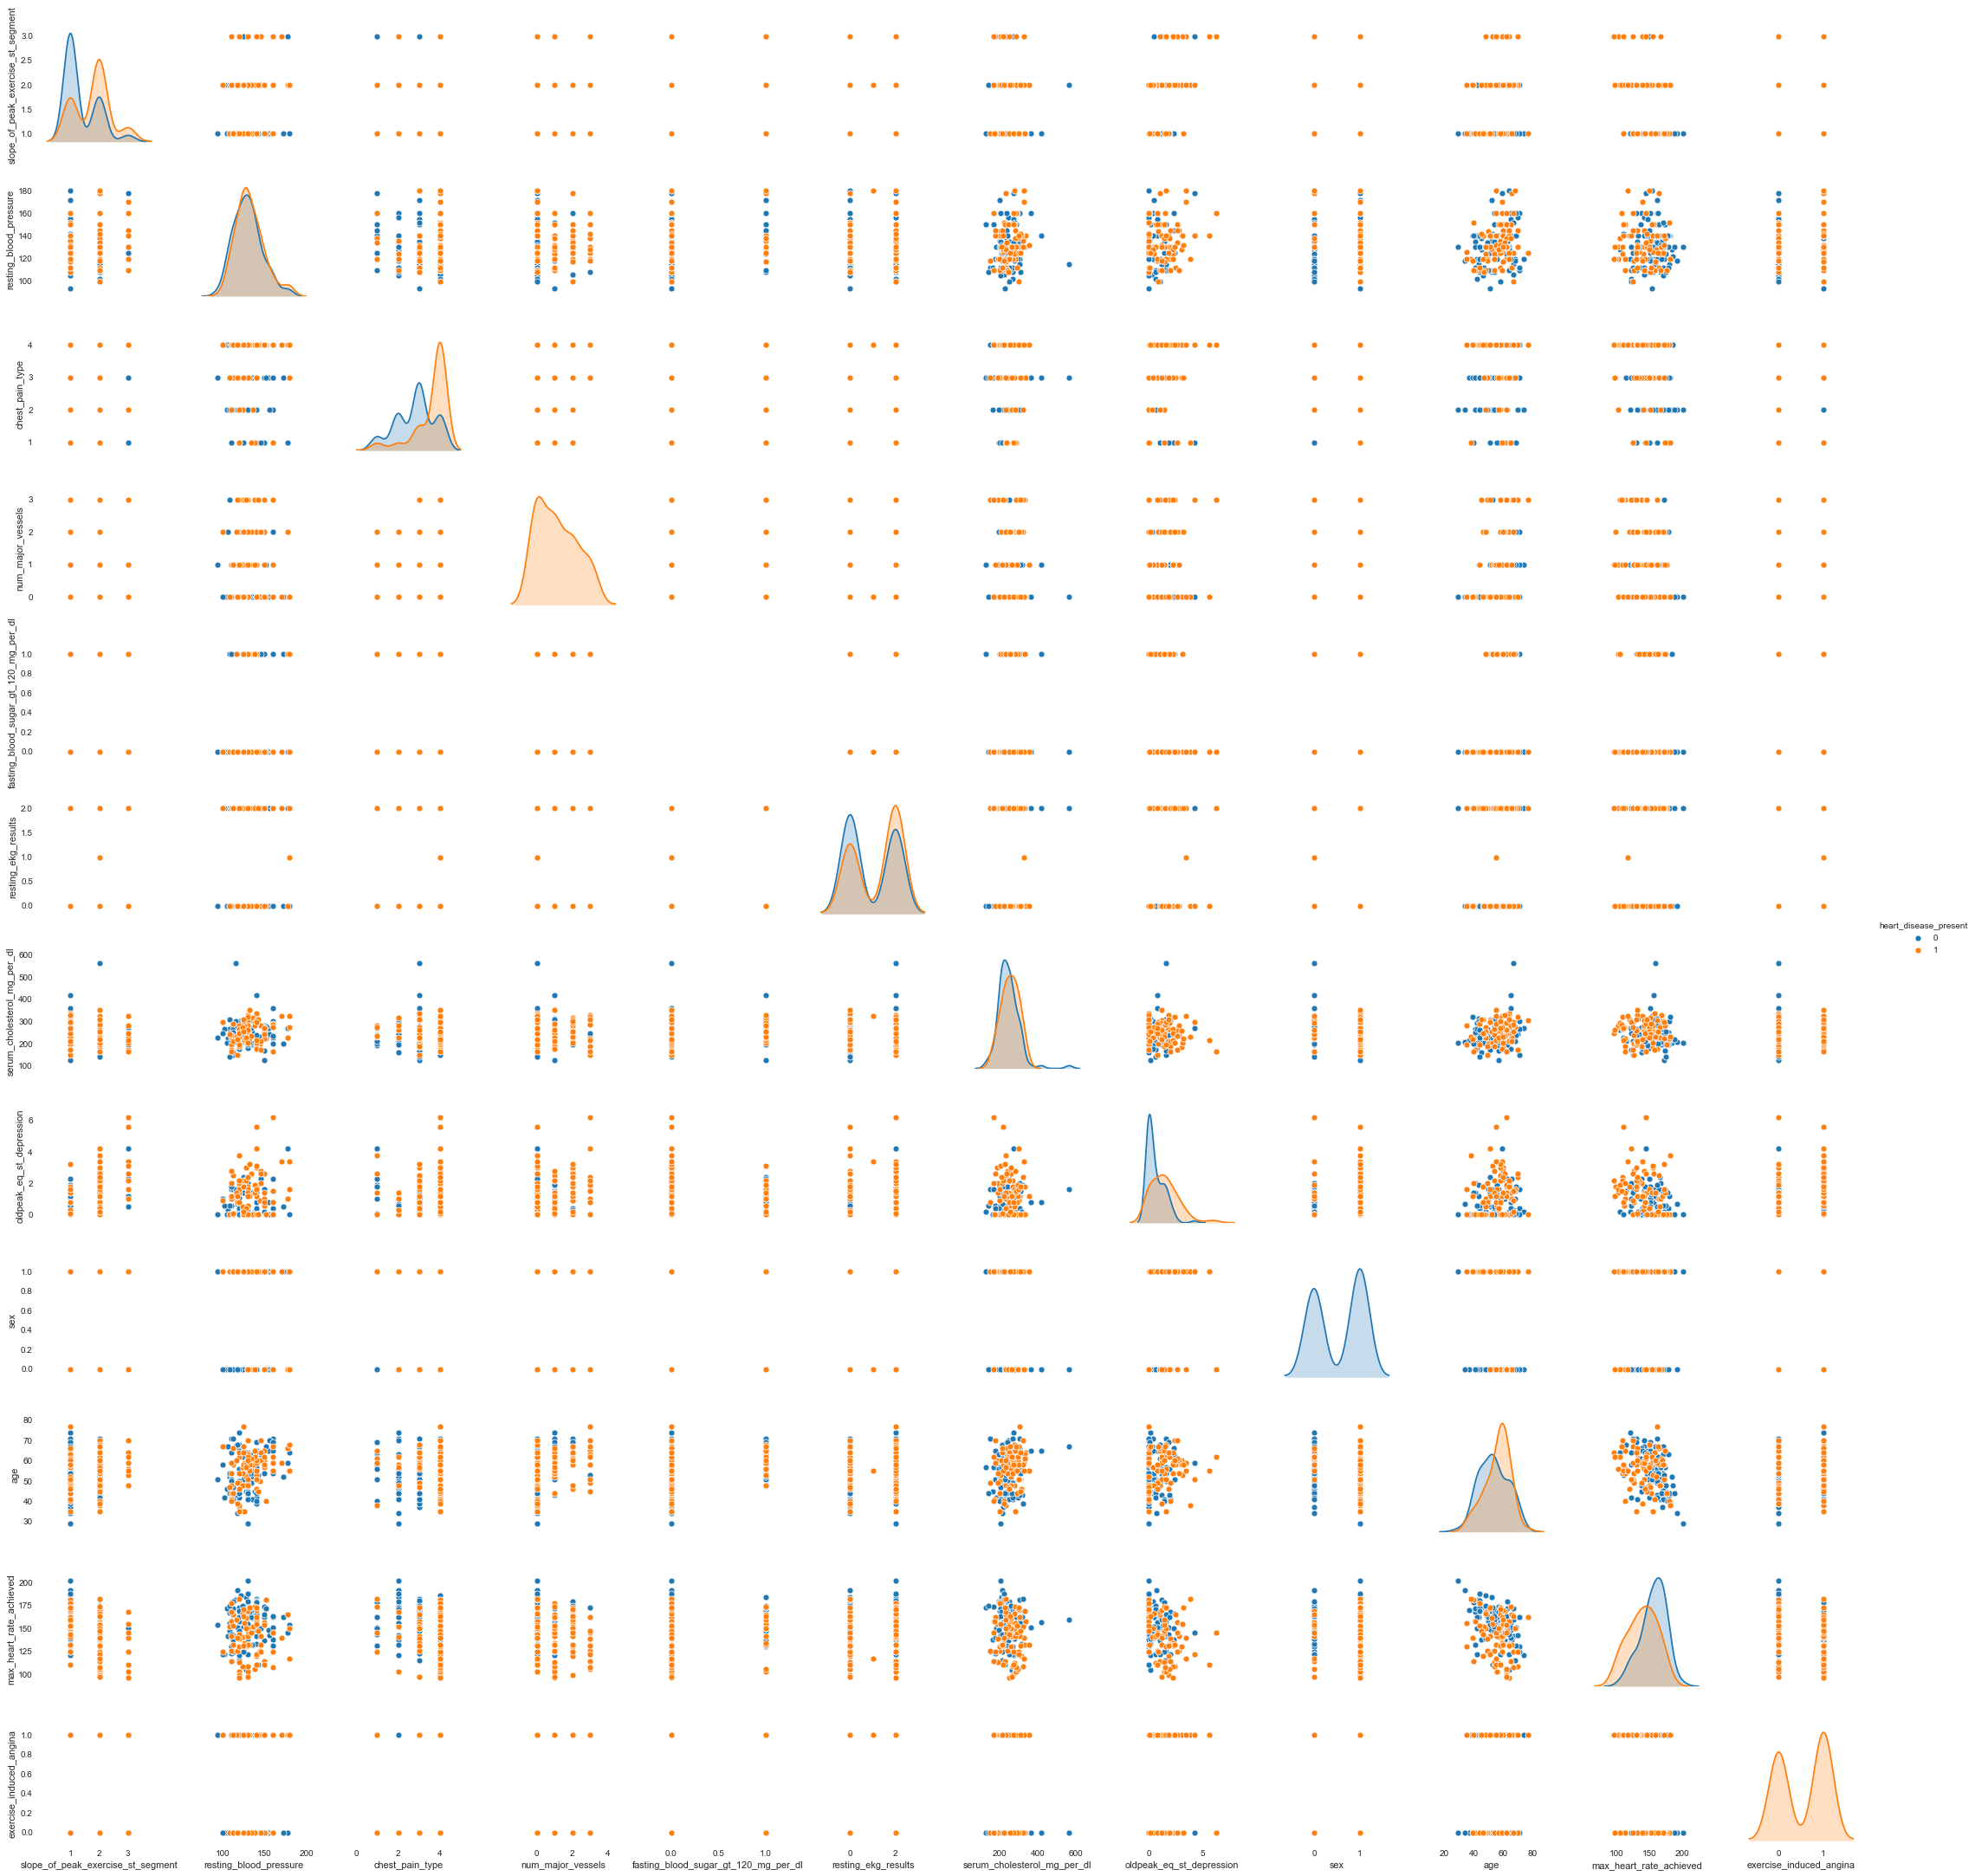

In [20]:
# To check a pairwise relationships in a dataset.
sb.pairplot(heart_disease_2,hue='heart_disease_present')

### Count Plot

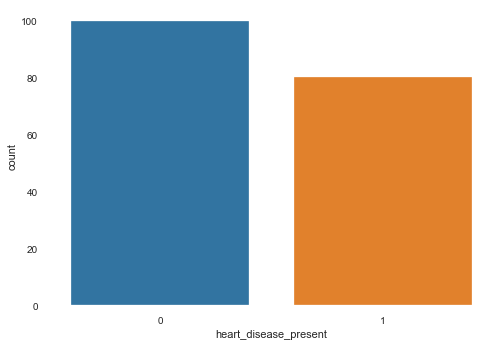

In [21]:
sb.countplot(heart_disease_2.heart_disease_present)

### scatter plot for Age vs. Max Heart Rate for Heart Disease

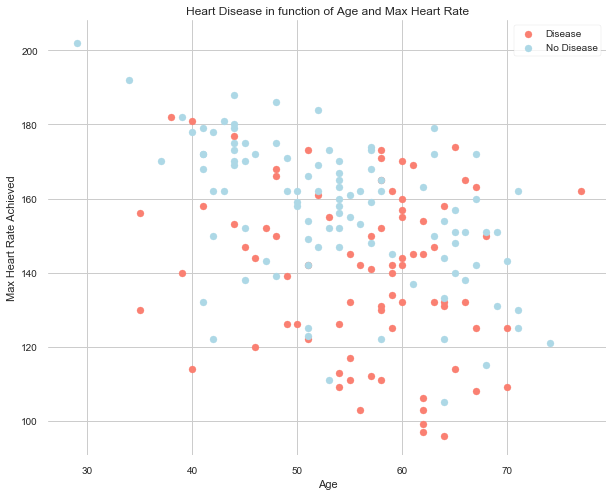

In [347]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(heart_disease_2.age[heart_disease_2.heart_disease_present==1],
            heart_disease_2.max_heart_rate_achieved[heart_disease_2.heart_disease_present==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(heart_disease_2.age[heart_disease_2.heart_disease_present==0],
            heart_disease_2.max_heart_rate_achieved[heart_disease_2.heart_disease_present==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate Achieved")
plt.legend(["Disease", "No Disease"]);

In [22]:
# To Find the number of unique values present in the each feature of the dataset.
heart_disease_2.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [23]:
heart_disease_2.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

### Features Exploration With Visualization

In [342]:
heart_disease_2.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [24]:
heart_disease_2.slope_of_peak_exercise_st_segment.value_counts()

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

In [25]:
heart_disease_2.slope_of_peak_exercise_st_segment.describe()

count    180.000000
mean       1.550000
std        0.618838
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: slope_of_peak_exercise_st_segment, dtype: float64

#### Count plot and Dist Plot for each and every feature

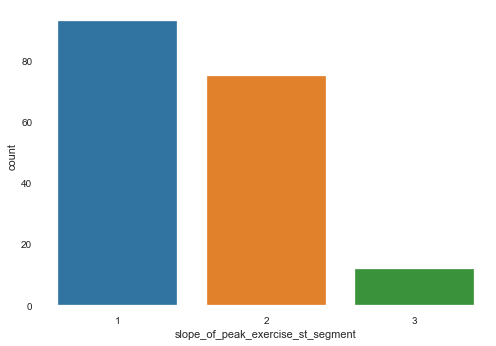

In [26]:
sb.countplot(heart_disease_2.slope_of_peak_exercise_st_segment)

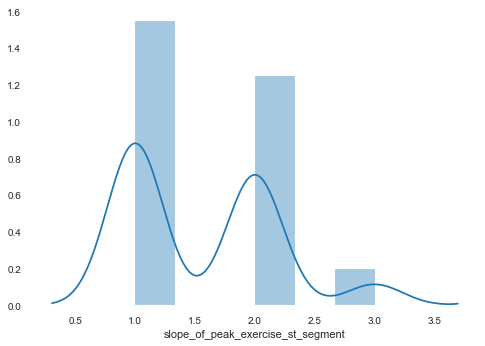

In [27]:
sb.distplot(heart_disease_2.slope_of_peak_exercise_st_segment)

In [28]:
heart_disease_2.thal.describe()

count        180
unique         3
top       normal
freq          98
Name: thal, dtype: object

In [29]:
heart_disease_2.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

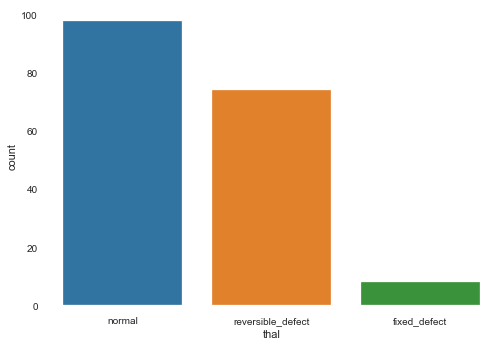

In [30]:
sb.countplot(heart_disease_2.thal)

In [31]:
heart_disease_2.resting_blood_pressure.describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

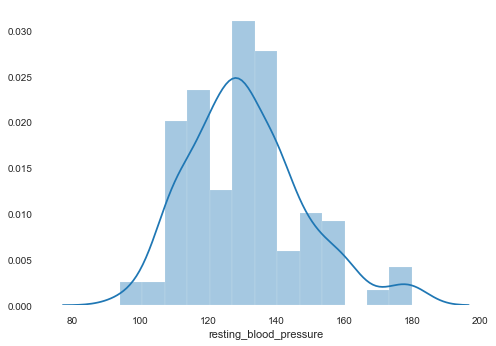

In [32]:
sb.distplot(heart_disease_2.resting_blood_pressure)

In [33]:
heart_disease_2.chest_pain_type.describe()

count    180.000000
mean       3.155556
std        0.938454
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: chest_pain_type, dtype: float64

In [34]:
heart_disease_2.chest_pain_type.value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

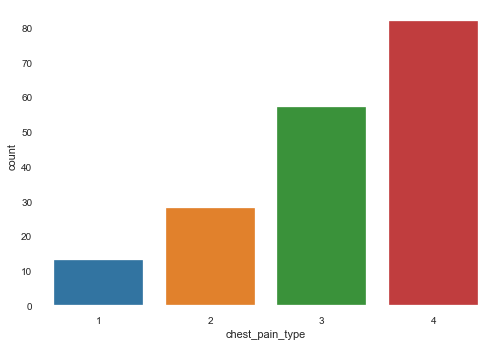

In [35]:
sb.countplot(heart_disease_2.chest_pain_type)

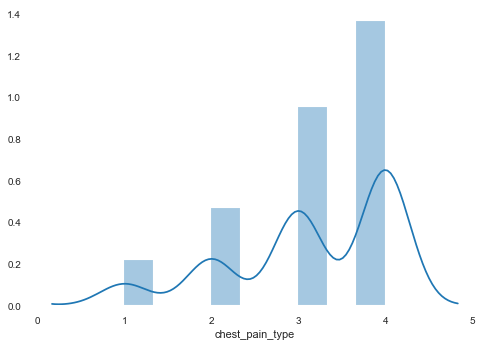

In [36]:
sb.distplot(heart_disease_2.chest_pain_type)

In [37]:
heart_disease_2.num_major_vessels.describe()

count    180.000000
mean       0.694444
std        0.969347
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: num_major_vessels, dtype: float64

In [38]:
heart_disease_2.num_major_vessels.value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

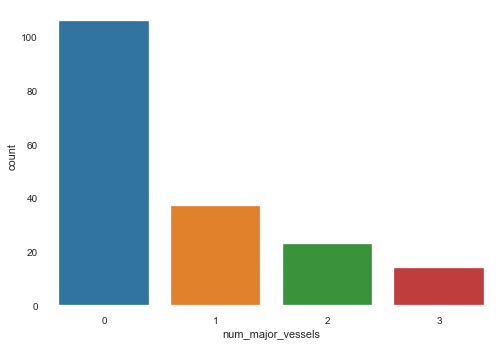

In [39]:
sb.countplot(heart_disease_2.num_major_vessels)

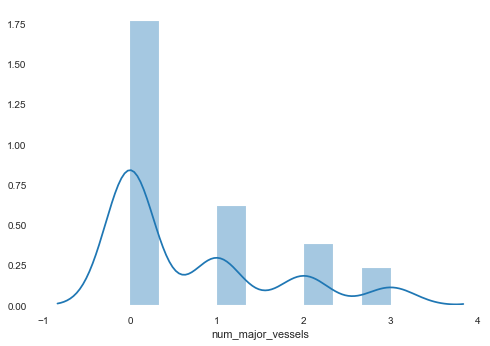

In [40]:
sb.distplot(heart_disease_2.num_major_vessels)

In [41]:
heart_disease_2.fasting_blood_sugar_gt_120_mg_per_dl.describe()

count    180.000000
mean       0.161111
std        0.368659
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: float64

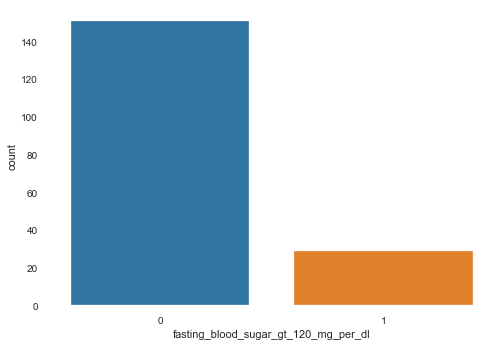

In [42]:
sb.countplot(heart_disease_2.fasting_blood_sugar_gt_120_mg_per_dl)

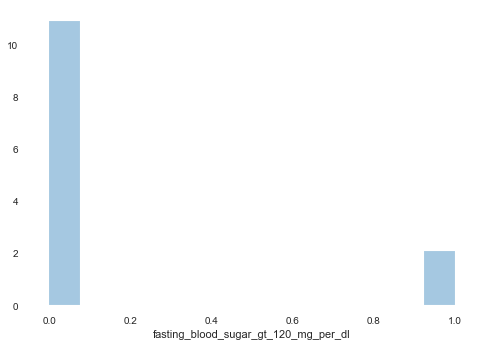

In [43]:
sb.distplot(heart_disease_2.fasting_blood_sugar_gt_120_mg_per_dl)

In [44]:
heart_disease_2.resting_ekg_results.describe()

count    180.000000
mean       1.050000
std        0.998742
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: resting_ekg_results, dtype: float64

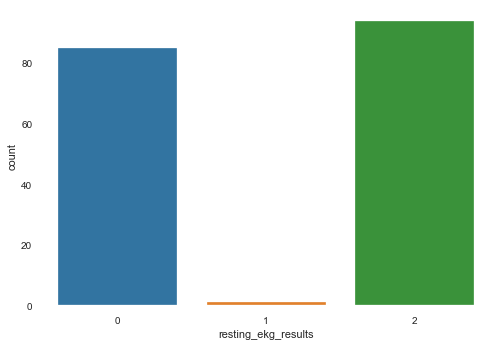

In [45]:
sb.countplot(heart_disease_2.resting_ekg_results)

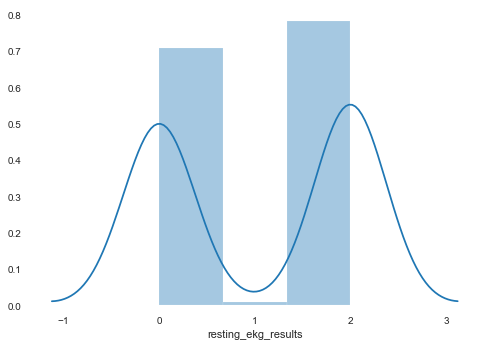

In [46]:
sb.distplot(heart_disease_2.resting_ekg_results)

In [47]:
heart_disease_2.serum_cholesterol_mg_per_dl.describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

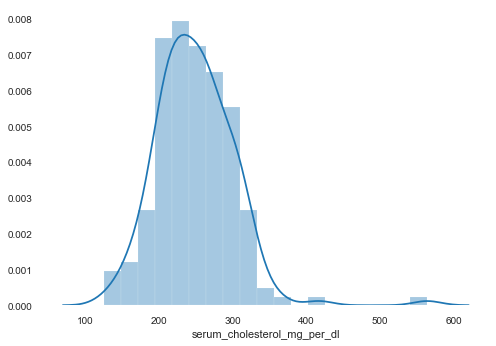

In [48]:
# This feature is having Outliers.
sb.distplot(heart_disease_2.serum_cholesterol_mg_per_dl)

In [49]:
heart_disease_2.oldpeak_eq_st_depression.describe()

count    180.000000
mean       1.010000
std        1.121357
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak_eq_st_depression, dtype: float64

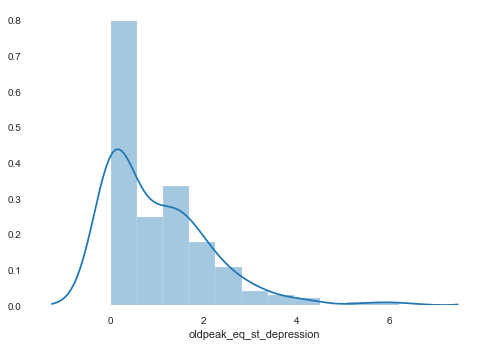

In [50]:
# This feature is having Outliers.
sb.distplot(heart_disease_2.oldpeak_eq_st_depression)

In [51]:
heart_disease_2.sex.describe()

count    180.000000
mean       0.688889
std        0.464239
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

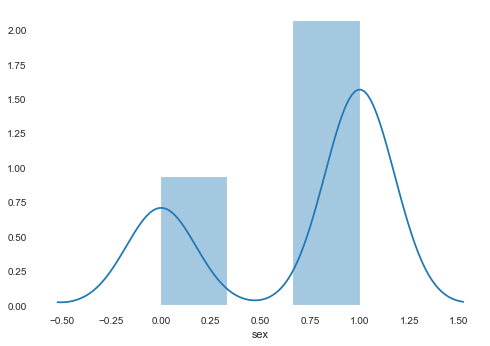

In [52]:
sb.distplot(heart_disease_2.sex)

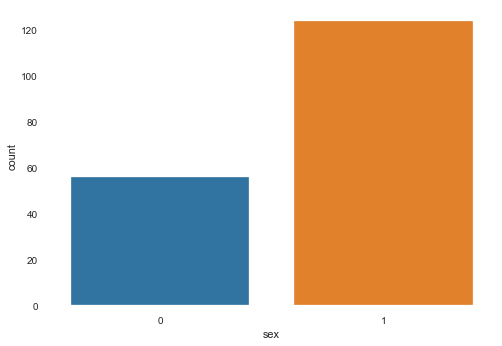

In [53]:
sb.countplot(heart_disease_2.sex)

In [54]:
heart_disease_2.age.describe()

count    180.000000
mean      54.811111
std        9.334737
min       29.000000
25%       48.000000
50%       55.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

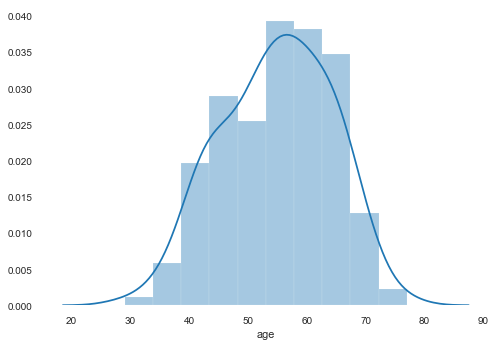

In [55]:
sb.distplot(heart_disease_2.age)

In [56]:
heart_disease_2.max_heart_rate_achieved.describe()

count    180.000000
mean     149.483333
std       22.063513
min       96.000000
25%      132.000000
50%      152.000000
75%      166.250000
max      202.000000
Name: max_heart_rate_achieved, dtype: float64

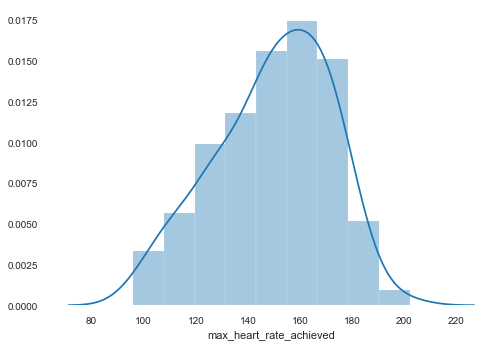

In [57]:
sb.distplot(heart_disease_2.max_heart_rate_achieved)

In [58]:
heart_disease_2.exercise_induced_angina.describe()

count    180.000000
mean       0.316667
std        0.466474
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exercise_induced_angina, dtype: float64

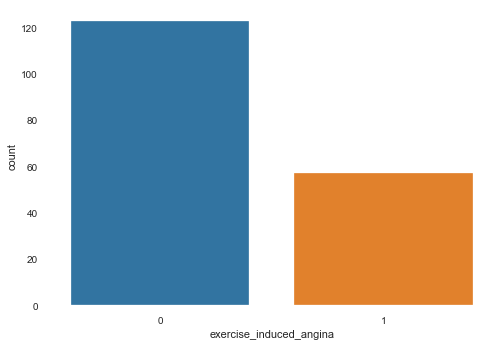

In [59]:
sb.countplot(heart_disease_2.exercise_induced_angina)

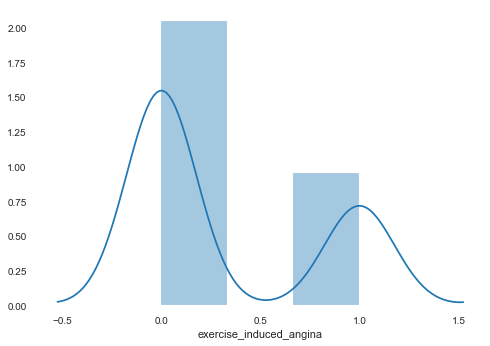

In [60]:
sb.distplot(heart_disease_2.exercise_induced_angina)

In [61]:
heart_disease_2.heart_disease_present.describe()

count    180.000000
mean       0.444444
std        0.498290
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: heart_disease_present, dtype: float64

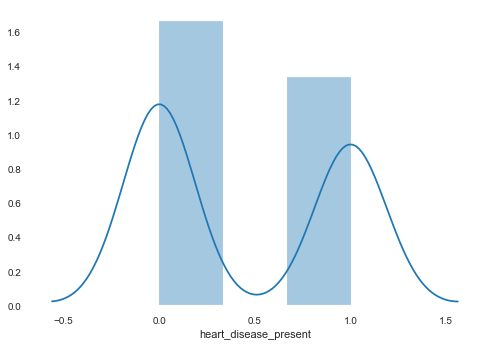

In [62]:
sb.distplot(heart_disease_2.heart_disease_present)

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

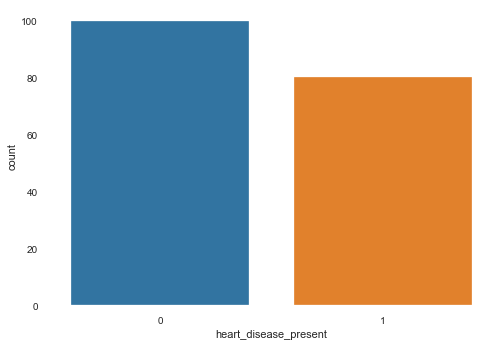

In [63]:
sb.countplot(heart_disease_2.heart_disease_present)

We have 100 person without heart disease and 80 person with heart disease, so our problem is balanced.

 The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data


### Dist Plot for the entire dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024058569188>,
      dtype=object)

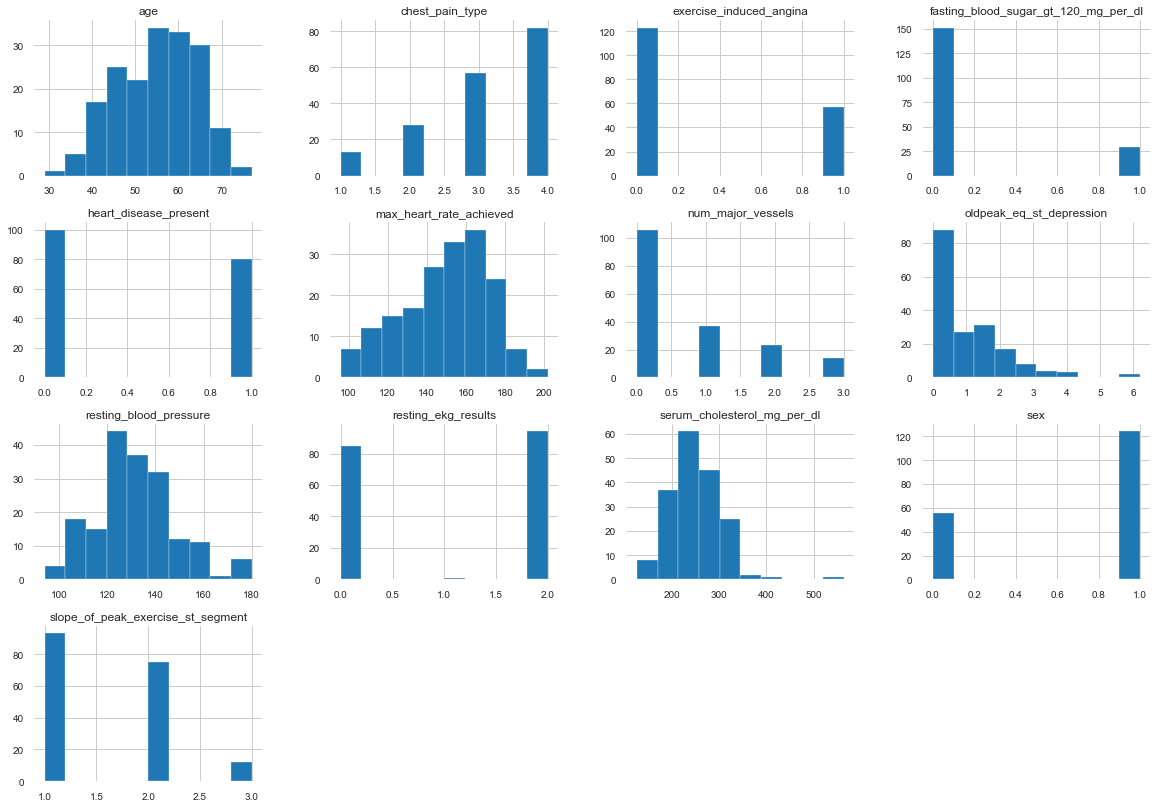

In [64]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 14
heart_disease_2.hist()

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

## Feature Engineering

### Dropping Features Based On Correlation

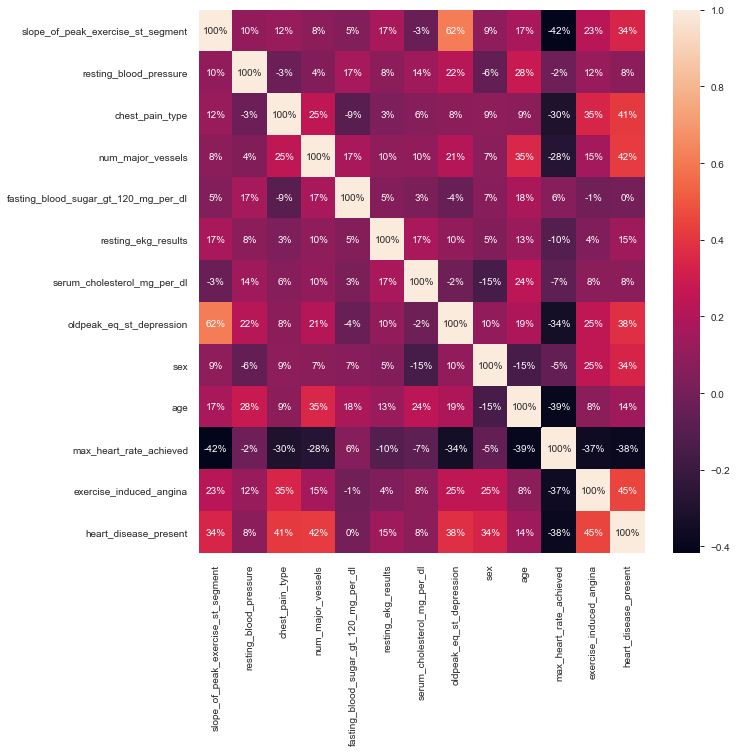

In [65]:
plt.figure(figsize=(10,10))
#plt.figure(figsize=(20,14))
sb.heatmap(heart_disease_2.corr(),annot=True,fmt='.0%')

In [66]:
heart_disease_2.corr()['heart_disease_present'].sort_values(ascending=False)

heart_disease_present                   1.000000
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
max_heart_rate_achieved                -0.375352
Name: heart_disease_present, dtype: float64

In [67]:
# Neither correlated with indpendent varliables nor with dependent variable
heart_disease_2.drop(['patient_id'],axis=1,inplace=True)

In [68]:
# It has 0 % correlation with "heart_disease_present" dependent feature
heart_disease_2.drop(['fasting_blood_sugar_gt_120_mg_per_dl'],axis=1,inplace=True)

In [69]:
heart_disease_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   slope_of_peak_exercise_st_segment  180 non-null    int64  
 1   thal                               180 non-null    object 
 2   resting_blood_pressure             180 non-null    int64  
 3   chest_pain_type                    180 non-null    int64  
 4   num_major_vessels                  180 non-null    int64  
 5   resting_ekg_results                180 non-null    int64  
 6   serum_cholesterol_mg_per_dl        180 non-null    int64  
 7   oldpeak_eq_st_depression           180 non-null    float64
 8   sex                                180 non-null    int64  
 9   age                                180 non-null    int64  
 10  max_heart_rate_achieved            180 non-null    int64  
 11  exercise_induced_angina            180 non-null    int64  

### Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables(in this case only one variable "thal" need to be converted) and scale all the values before training the Machine Learning models. First, I'll use the LabelEncoder method to create numeric columns for categorical variable.

LabelEncoder, for Categorical Feature

In [70]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
heart_disease_2.thal=enc.fit_transform(heart_disease_2.thal)
heart_disease_2.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,2,270,4.2,1,59,145,0,0


### Skewness , Kurtosis and Z_Score

In [71]:
from scipy import stats

In [72]:
# Skewness of the dependent variable , to measure the symmetry

print("skewness:" , stats.skew(heart_disease_2.heart_disease_present)) # range -1<s<1

skewness: 0.22360679774997907


In [73]:
# Kurtosis of the dependent Variable, to measure the peakedness of the variable

print("kurtosis:" , stats.kurtosis(heart_disease_2.heart_disease_present)) # range -1<k<1

kurtosis: -1.9500000000000002


In [74]:
# Skewness of the entire dataset.
pd.DataFrame(stats.skew(heart_disease_2))

,0
0,0.660586
1,-0.197028
2,0.651592
3,-0.842165
4,1.158243
5,-0.100124
6,1.263291
7,1.494821
8,-0.816026
9,-0.197502


In [75]:
heart_disease_2.serum_cholesterol_mg_per_dl.value_counts()

204    4
239    4
219    3
254    3
309    3
226    3
303    3
211    3
282    3
233    3
234    3
256    3
263    3
277    2
265    2
203    2
199    2
197    2
188    2
177    2
258    2
149    2
330    2
308    2
283    2
266    2
304    2
267    2
302    2
299    2
269    2
270    2
273    2
274    2
294    2
255    2
212    2
223    2
230    2
243    2
244    2
245    2
229    2
228    2
246    2
250    2
214    2
227    1
286    1
305    1
300    1
225    1
224    1
311    1
298    1
295    1
231    1
293    1
290    1
289    1
281    1
564    1
248    1
253    1
259    1
261    1
262    1
252    1
249    1
268    1
232    1
271    1
275    1
276    1
236    1
235    1
315    1
313    1
319    1
210    1
198    1
185    1
217    1
192    1
193    1
195    1
196    1
216    1
215    1
218    1
200    1
201    1
213    1
205    1
206    1
207    1
209    1
180    1
175    1
321    1
126    1
322    1
325    1
326    1
327    1
335    1
353    1
360    1
141    1
174    1
222    1
1

In [76]:
heart_disease_2.serum_cholesterol_mg_per_dl.describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

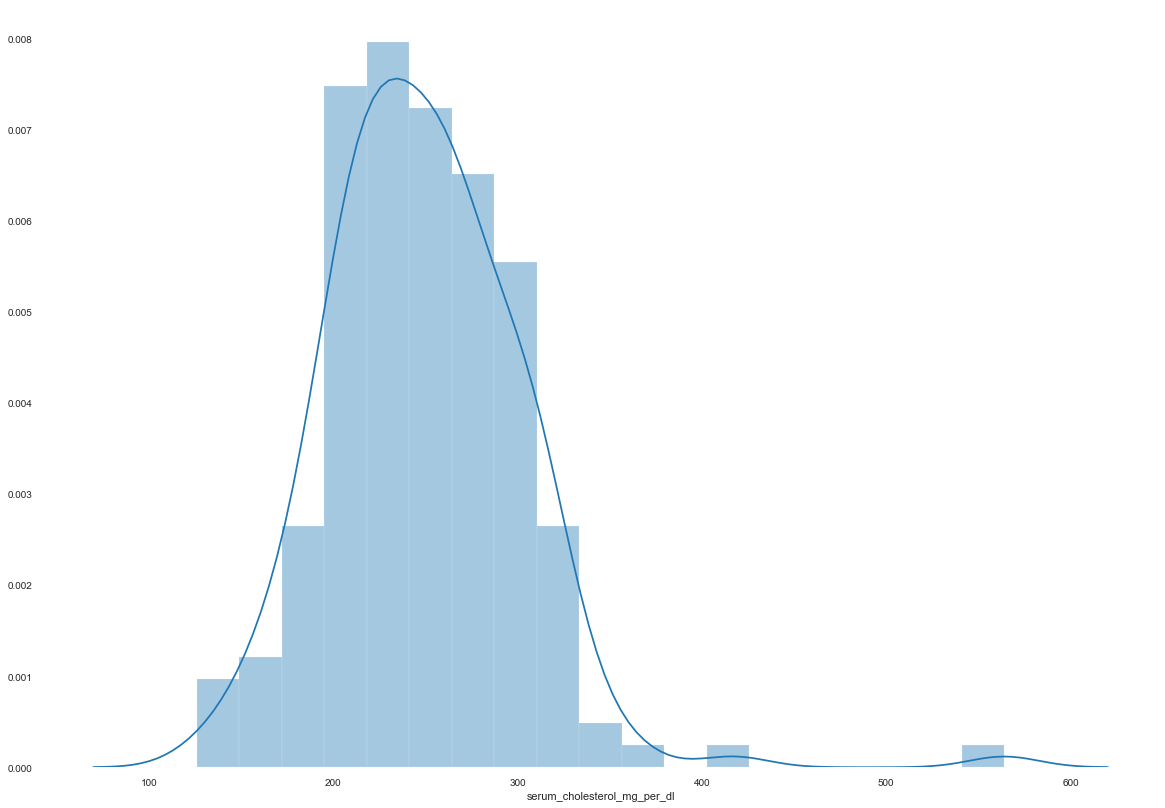

In [77]:
# This feature is having Outlier at the right side, since MEAN > MEDIAN (MEAN is slightly greater than MEDIAN)
sb.distplot(heart_disease_2.serum_cholesterol_mg_per_dl)

In [78]:
heart_disease_2.num_major_vessels.value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

In [79]:
heart_disease_2.num_major_vessels.describe()

count    180.000000
mean       0.694444
std        0.969347
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: num_major_vessels, dtype: float64

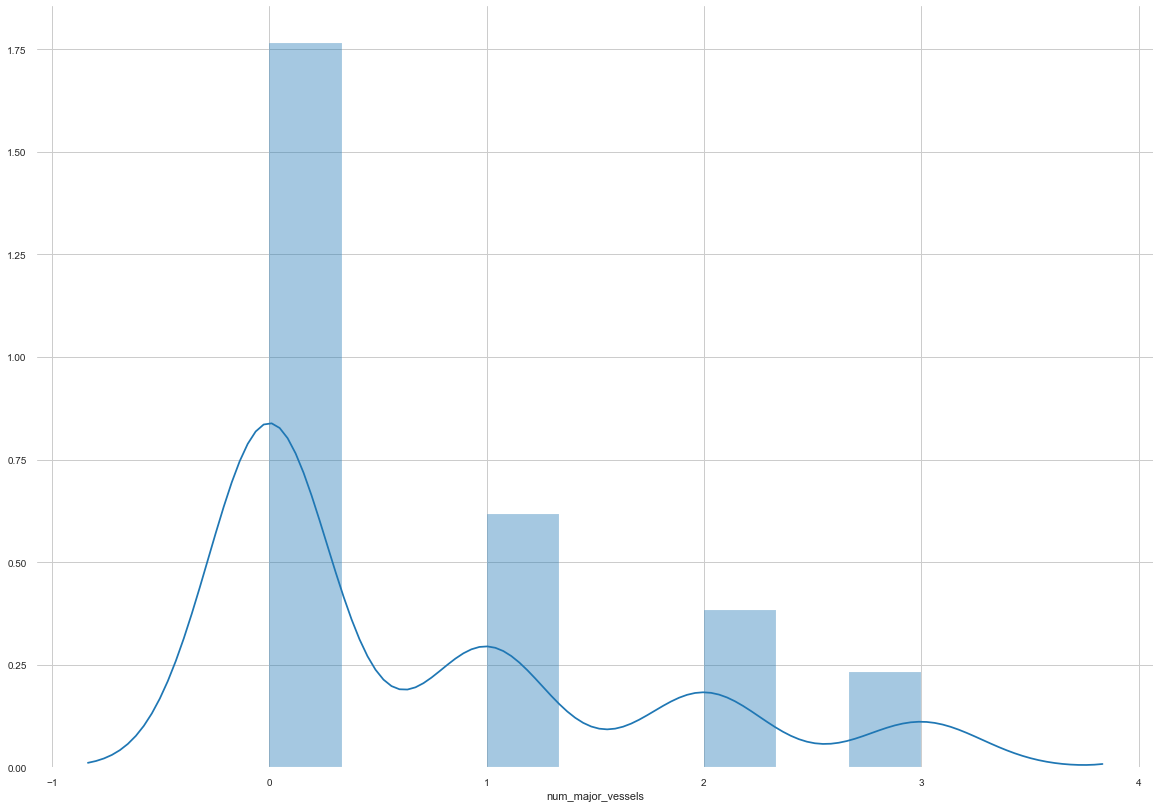

In [80]:
sb.set_style("whitegrid")
sb.distplot(heart_disease_2.num_major_vessels)

In [204]:
heart_disease_2.oldpeak_eq_st_depression.describe()

count   180.00
mean      1.01
std       1.12
min       0.00
25%       0.00
50%       0.80
75%       1.60
max       6.20
Name: oldpeak_eq_st_depression, dtype: float64

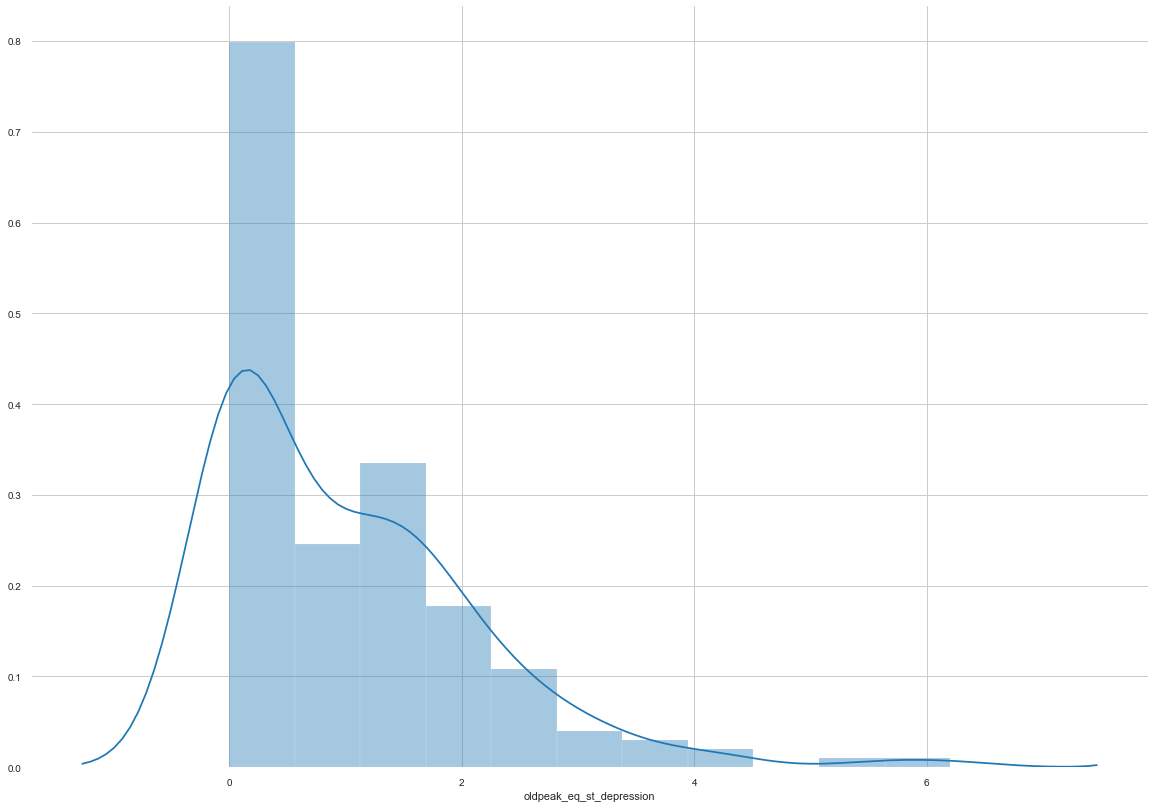

In [82]:
sb.distplot(heart_disease_2.oldpeak_eq_st_depression)

In [203]:
#Kurtosis of the entire Dataset
pd.DataFrame(stats.kurtosis(heart_disease_2))

,0
0,-0.52
1,-0.76
2,0.43
3,-0.30
4,0.10
5,-1.98
6,6.16
7,3.12
8,-1.33
9,-0.58


### To Remove Outliers Using z_score

In [202]:
# To check  the standard score is the number of standard deviations by which the value of a raw score is above or below the mean value.
z_scores=stats.zscore(heart_disease_2)
heart_disease_3=pd.DataFrame(z_scores)
heart_disease_3

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.89,-0.65,-0.20,-1.23,-0.72,0.95,1.12,-0.90,0.67,-1.05,0.93,-0.68,-0.89
1,0.73,-0.65,-1.26,-0.17,-0.72,-1.05,-0.67,0.53,-1.49,-0.09,0.39,-0.68,-0.89
2,-0.89,-0.65,-0.37,0.90,2.39,0.95,1.04,-0.90,0.67,2.38,0.57,1.47,1.12
3,-0.89,1.12,1.22,0.90,-0.72,-1.05,-0.50,-0.90,0.67,-1.59,1.43,-0.68,1.12
4,2.35,1.12,2.75,-2.30,-0.72,0.95,0.40,2.85,0.67,0.45,-0.20,-0.68,-0.89
5,-0.89,-0.65,-0.08,-0.17,-0.72,-1.05,-1.32,-0.90,0.67,-1.38,0.02,-0.68,-0.89
6,0.73,1.12,1.10,0.90,1.35,0.95,0.17,1.42,-1.49,0.56,0.34,-0.68,1.12
7,0.73,-2.41,1.10,0.90,0.32,0.95,0.51,-0.37,0.67,0.24,-1.70,1.47,1.12
8,2.35,1.12,2.28,0.90,-0.72,0.95,1.46,2.14,0.67,0.45,-0.43,1.47,1.12
9,0.73,-0.65,-0.67,-0.17,-0.72,-1.05,-0.57,0.53,-1.49,-0.52,0.39,-0.68,-0.89


In [205]:
z_score=np.abs(heart_disease_3)

In [206]:
filtered_entries=(z_score<3).all(axis=1)
heart_disease_final=heart_disease_2[filtered_entries]
heart_disease_final

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,2,308,0.00,1,45,170,0,0
1,2,1,110,3,0,0,214,1.60,0,54,158,0,0
2,1,1,125,4,3,2,304,0.00,1,77,162,1,1
3,1,2,152,4,0,0,223,0.00,1,40,181,0,1
4,3,2,178,1,0,2,270,4.20,1,59,145,0,0
5,1,1,130,3,0,0,180,0.00,1,42,150,0,0
6,2,2,150,4,2,2,258,2.60,0,60,157,0,1
7,2,0,150,4,1,2,276,0.60,1,57,112,1,1
8,3,2,170,4,0,2,326,3.40,1,59,140,1,1
9,2,1,120,3,0,0,219,1.60,0,50,158,0,0


In [207]:
# Final Shape of the DataFrame after removing the Outliers from the Features
print(heart_disease_final.shape) 
print(heart_disease_2.shape)

(176, 13)
(180, 13)


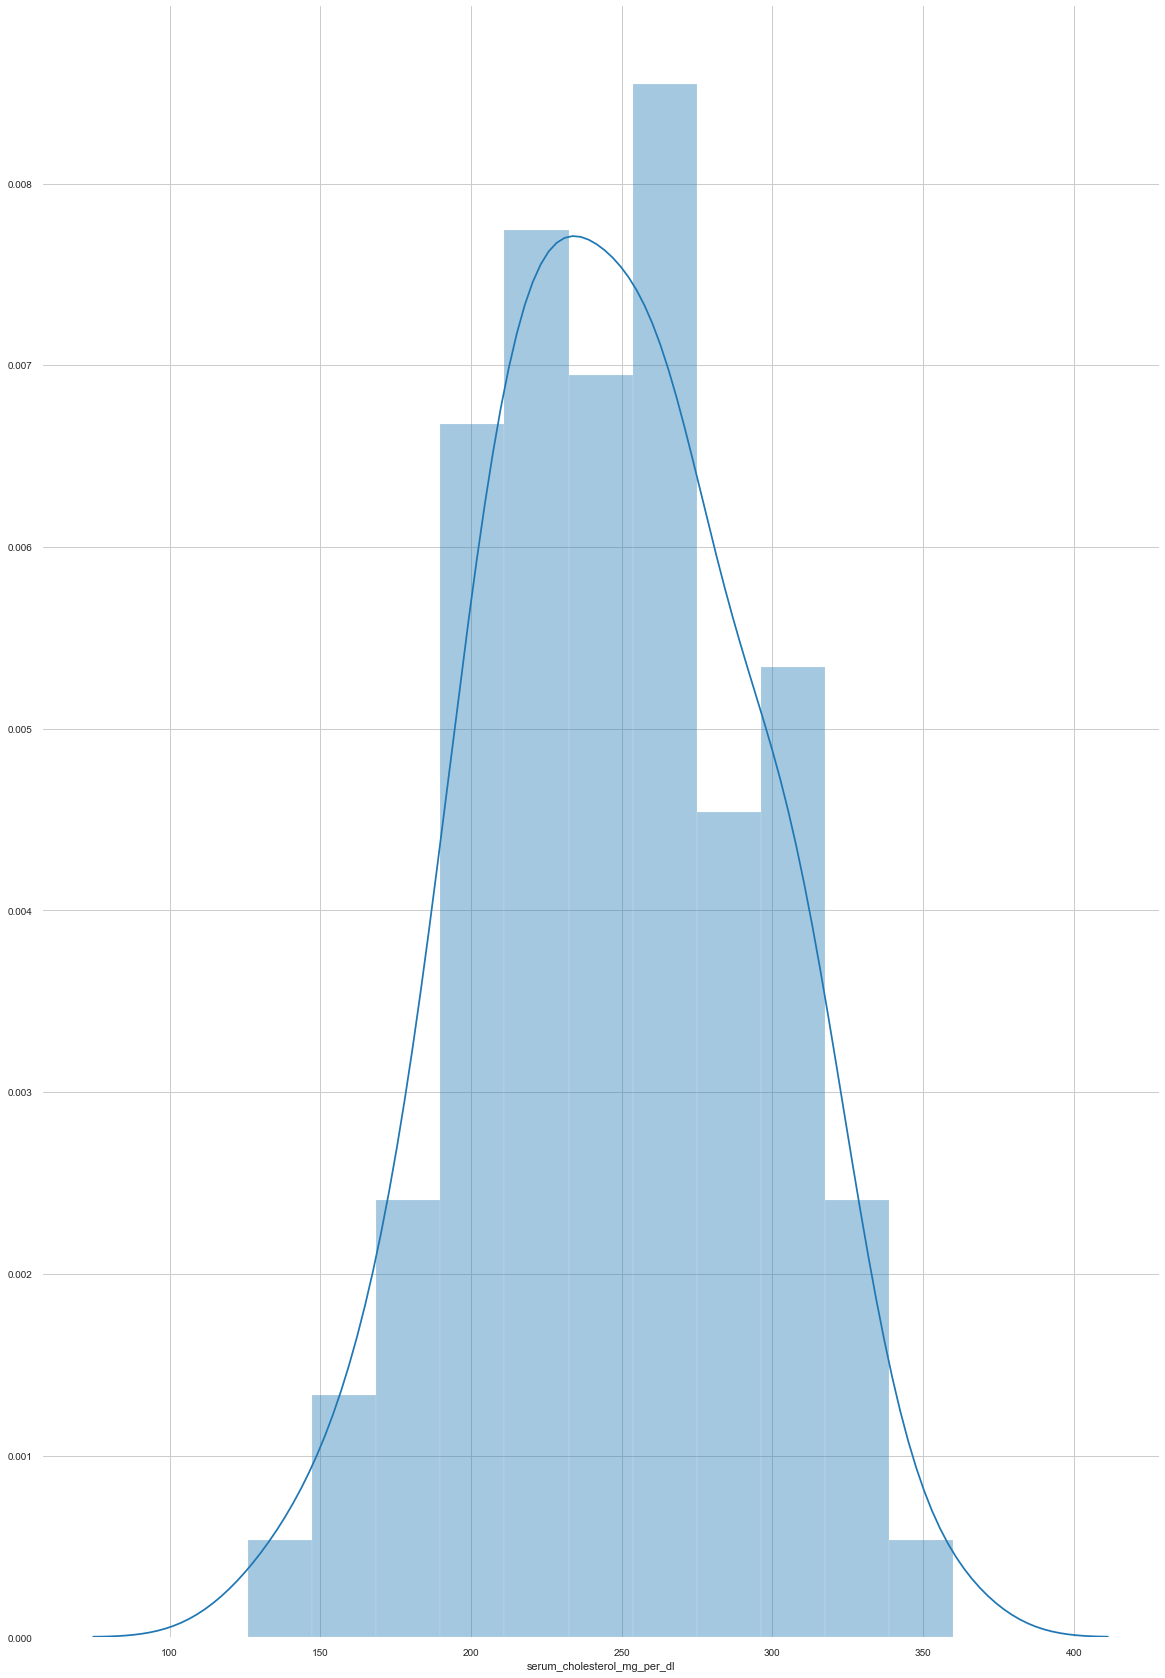

In [208]:
# After Removing Outliers
sb.distplot(heart_disease_final.serum_cholesterol_mg_per_dl)

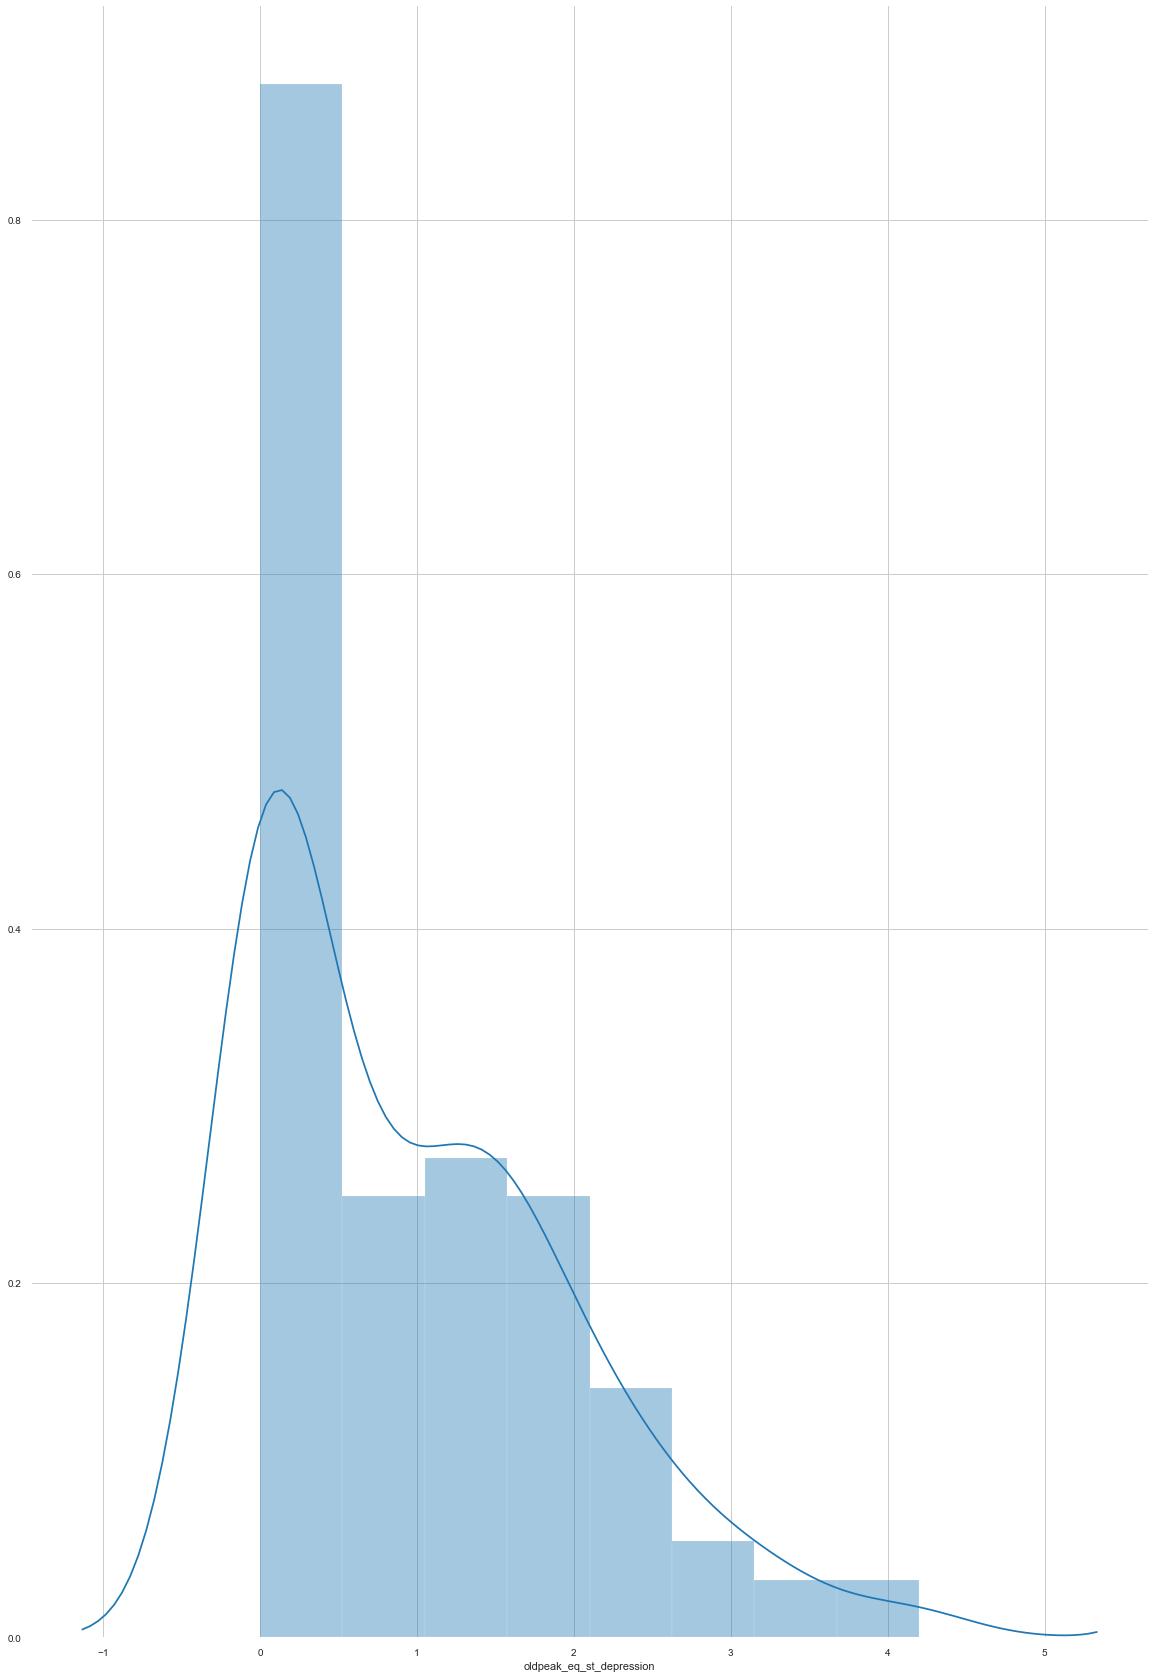

In [209]:
sb.distplot(heart_disease_final.oldpeak_eq_st_depression)

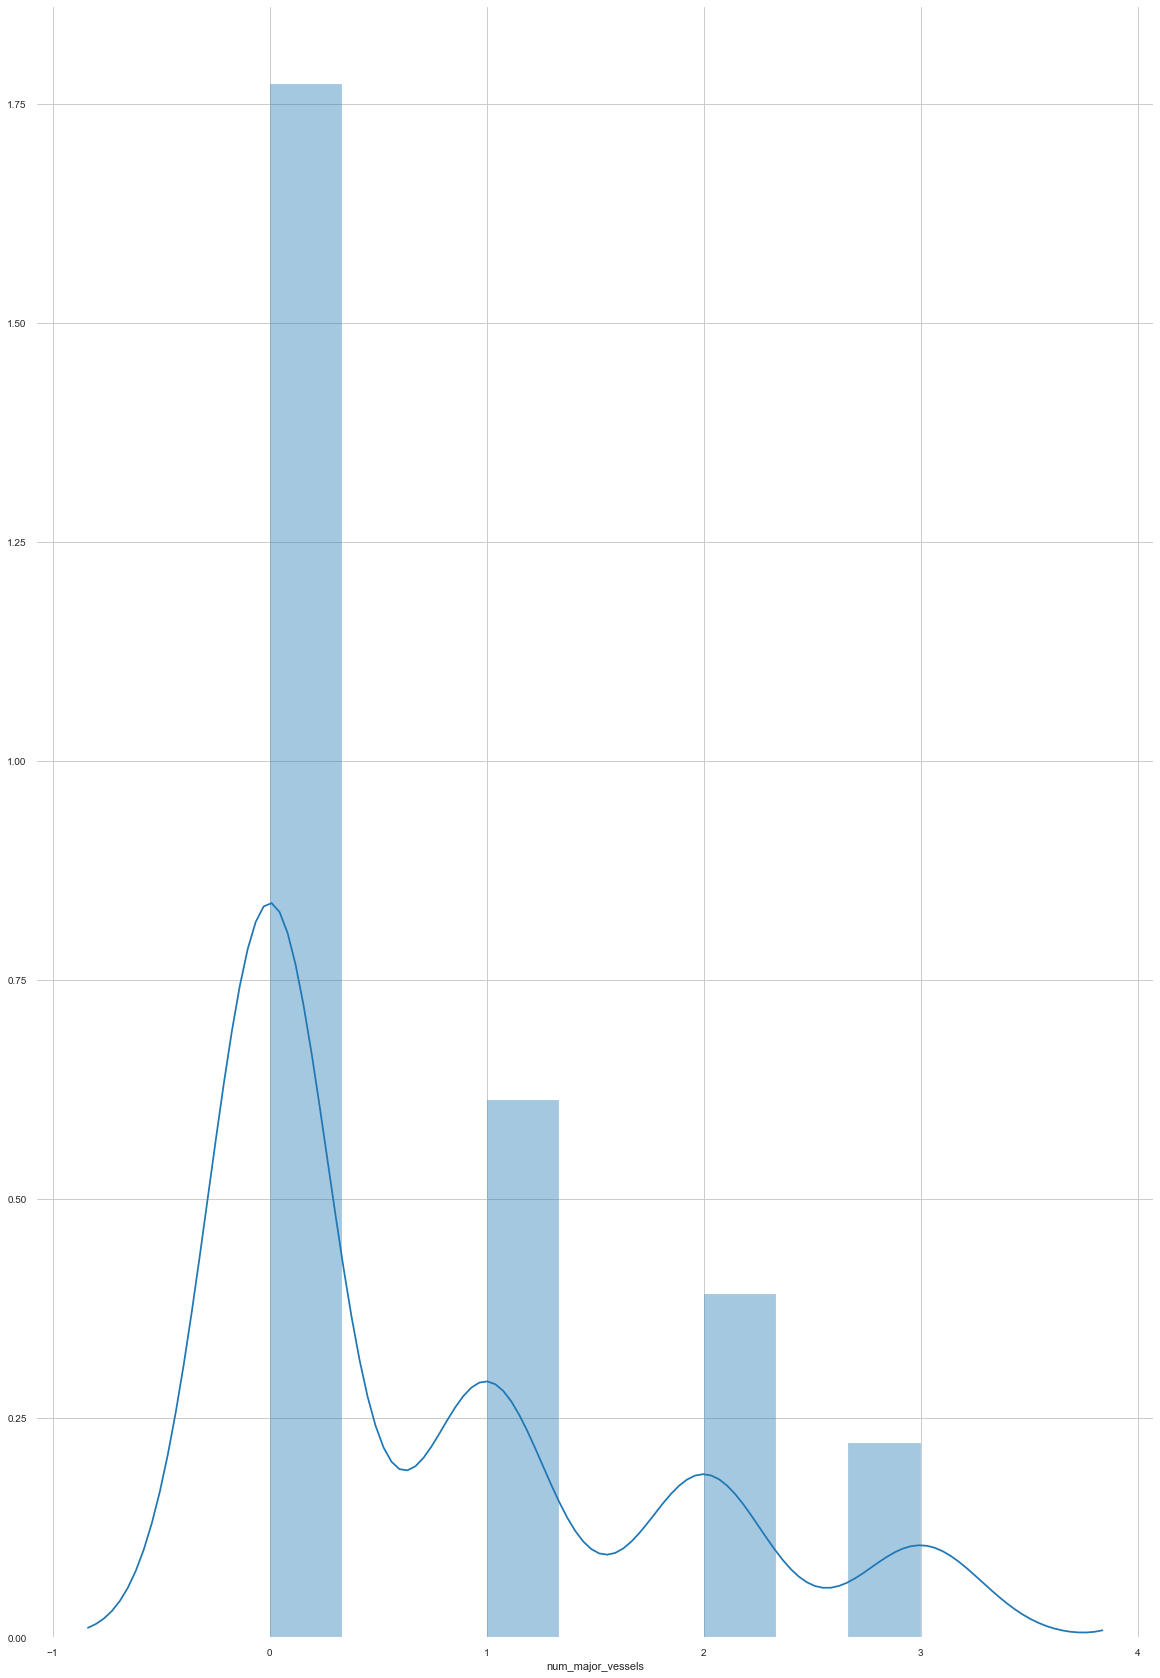

In [210]:
sb.distplot(heart_disease_final.num_major_vessels)

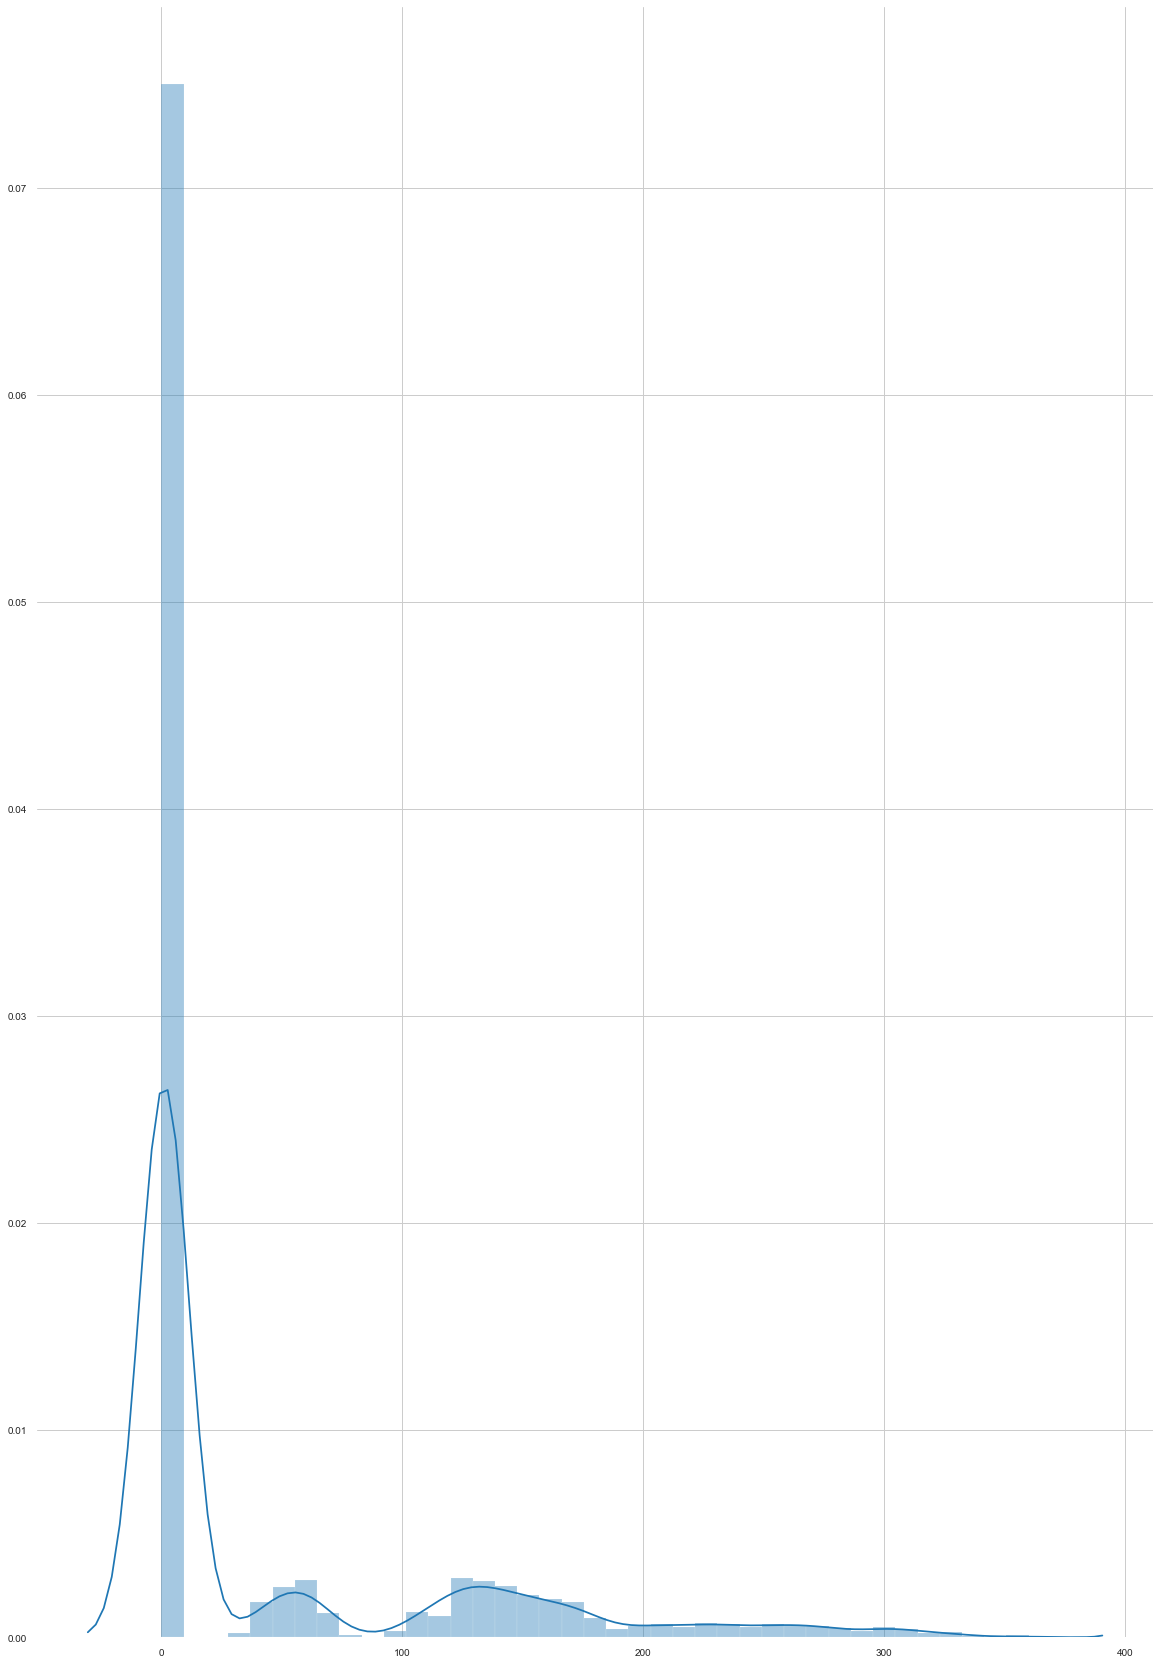

In [211]:
sb.set_style("whitegrid")
sb.distplot(heart_disease_final)


### Defining X and y

In [212]:
X=heart_disease_final.iloc[:,:-1]
y=heart_disease_final.heart_disease_present

In [213]:
X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,2,308,0.00,1,45,170,0
1,2,1,110,3,0,0,214,1.60,0,54,158,0
2,1,1,125,4,3,2,304,0.00,1,77,162,1
3,1,2,152,4,0,0,223,0.00,1,40,181,0
4,3,2,178,1,0,2,270,4.20,1,59,145,0


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score,ConfusionMatrixDisplay,confusion_matrix,precision_recall_curve,roc_auc_score,plot_roc_curve,plot_precision_recall_curve,RocCurveDisplay,roc_curve

In [215]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=3)

In [216]:
X_train.shape

(105, 12)

In [217]:
y_train.shape

(105,)

## MODELS

## 1. Model Using Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
model=LogisticRegression()

In [221]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8309859154929577

In [222]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,35,3
1,9,24


In [223]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.809524
Accuracy on test set: 0.830986


## 2. Model Using Random Forest

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.45,random_state=5)

In [225]:
model=RandomForestClassifier(max_features='auto',max_depth=200,n_estimators=800,min_samples_split=2,random_state=5)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.75

In [226]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,38,10
1,10,22


In [227]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 1.000000
Accuracy on test set: 0.750000


### Feature_Importances

In [228]:
model.feature_importances_

array([0.06512514, 0.17925167, 0.05786273, 0.09360529, 0.12861183,
       0.02626552, 0.07337595, 0.09327698, 0.04727824, 0.0759402 ,
       0.09438961, 0.06501684])

In [229]:
pd.DataFrame(model.feature_importances_,index= X.columns).sort_values(0,ascending=False)

,0
thal,0.18
num_major_vessels,0.13
max_heart_rate_achieved,0.09
chest_pain_type,0.09
oldpeak_eq_st_depression,0.09
age,0.08
serum_cholesterol_mg_per_dl,0.07
slope_of_peak_exercise_st_segment,0.07
exercise_induced_angina,0.07
resting_blood_pressure,0.06


In [231]:
X=heart_disease_final.iloc[:,:-1]
y=heart_disease_final.heart_disease_present

In [232]:
X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,2,308,0.00,1,45,170,0
1,2,1,110,3,0,0,214,1.60,0,54,158,0
2,1,1,125,4,3,2,304,0.00,1,77,162,1
3,1,2,152,4,0,0,223,0.00,1,40,181,0
4,3,2,178,1,0,2,270,4.20,1,59,145,0


### Scaling
scale all the values before training the Machine Learning models

Now, I will use the scale from sklearn to scale my dataset.
Needed for only Numeric Features

In [287]:
from sklearn.preprocessing import scale
heart_scaled=pd.DataFrame(scale(X), columns=X.columns)
heart_scaled

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,-0.89,-0.63,-0.19,-1.22,-0.72,0.96,1.34,-0.95,0.66,-1.03,0.92,-0.68
1,0.77,-0.63,-1.25,-0.16,-0.72,-1.04,-0.73,0.65,-1.52,-0.07,0.38,-0.68
2,-0.89,-0.63,-0.36,0.90,2.41,0.96,1.26,-0.95,0.66,2.40,0.56,1.46
3,-0.89,1.13,1.23,0.90,-0.72,-1.04,-0.53,-0.95,0.66,-1.57,1.42,-0.68
4,2.43,1.13,2.76,-2.28,-0.72,0.96,0.50,3.25,0.66,0.47,-0.21,-0.68
5,-0.89,-0.63,-0.07,-0.16,-0.72,-1.04,-1.48,-0.95,0.66,-1.36,0.02,-0.68
6,0.77,1.13,1.11,0.90,1.37,0.96,0.24,1.65,-1.52,0.57,0.33,-0.68
7,0.77,-2.40,1.11,0.90,0.33,0.96,0.64,-0.35,0.66,0.25,-1.71,1.46
8,2.43,1.13,2.29,0.90,-0.72,0.96,1.74,2.45,0.66,0.47,-0.44,1.46
9,0.77,-0.63,-0.66,-0.16,-0.72,-1.04,-0.62,0.65,-1.52,-0.50,0.38,-0.68


### Random Forest Model After Feature_Importances

In [288]:
X=heart_scaled
#y=heart_scaled.heart_disease_present
X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,-0.89,-0.63,-0.19,-1.22,-0.72,0.96,1.34,-0.95,0.66,-1.03,0.92,-0.68
1,0.77,-0.63,-1.25,-0.16,-0.72,-1.04,-0.73,0.65,-1.52,-0.07,0.38,-0.68
2,-0.89,-0.63,-0.36,0.90,2.41,0.96,1.26,-0.95,0.66,2.40,0.56,1.46
3,-0.89,1.13,1.23,0.90,-0.72,-1.04,-0.53,-0.95,0.66,-1.57,1.42,-0.68
4,2.43,1.13,2.76,-2.28,-0.72,0.96,0.50,3.25,0.66,0.47,-0.21,-0.68


In [289]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   slope_of_peak_exercise_st_segment  176 non-null    float64
 1   thal                               176 non-null    float64
 2   resting_blood_pressure             176 non-null    float64
 3   chest_pain_type                    176 non-null    float64
 4   num_major_vessels                  176 non-null    float64
 5   resting_ekg_results                176 non-null    float64
 6   serum_cholesterol_mg_per_dl        176 non-null    float64
 7   oldpeak_eq_st_depression           176 non-null    float64
 8   sex                                176 non-null    float64
 9   age                                176 non-null    float64
 10  max_heart_rate_achieved            176 non-null    float64
 11  exercise_induced_angina            176 non-null    float64

In [290]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [291]:
model=RandomForestClassifier(max_features='log2',max_depth=400,n_estimators=800,min_samples_split=2,random_state=5)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7547169811320755

In [292]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,27,5
1,8,13


In [293]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 1.000000
Accuracy on test set: 0.754717


In [294]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.72      0.62      0.67        21

    accuracy                           0.75        53
   macro avg       0.75      0.73      0.74        53
weighted avg       0.75      0.75      0.75        53



### f1_score , roc_curve and roc_auc_curve

In [295]:
f1_score(y_test,y_predict)

0.6666666666666666

In [296]:
roc_curve(y_test,y_predict)

(array([0.     , 0.15625, 1.     ]),
 array([0.        , 0.61904762, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [297]:
roc_auc_score(y_test,y_predict)

0.7313988095238095

### Plotting precision_recall_curve()

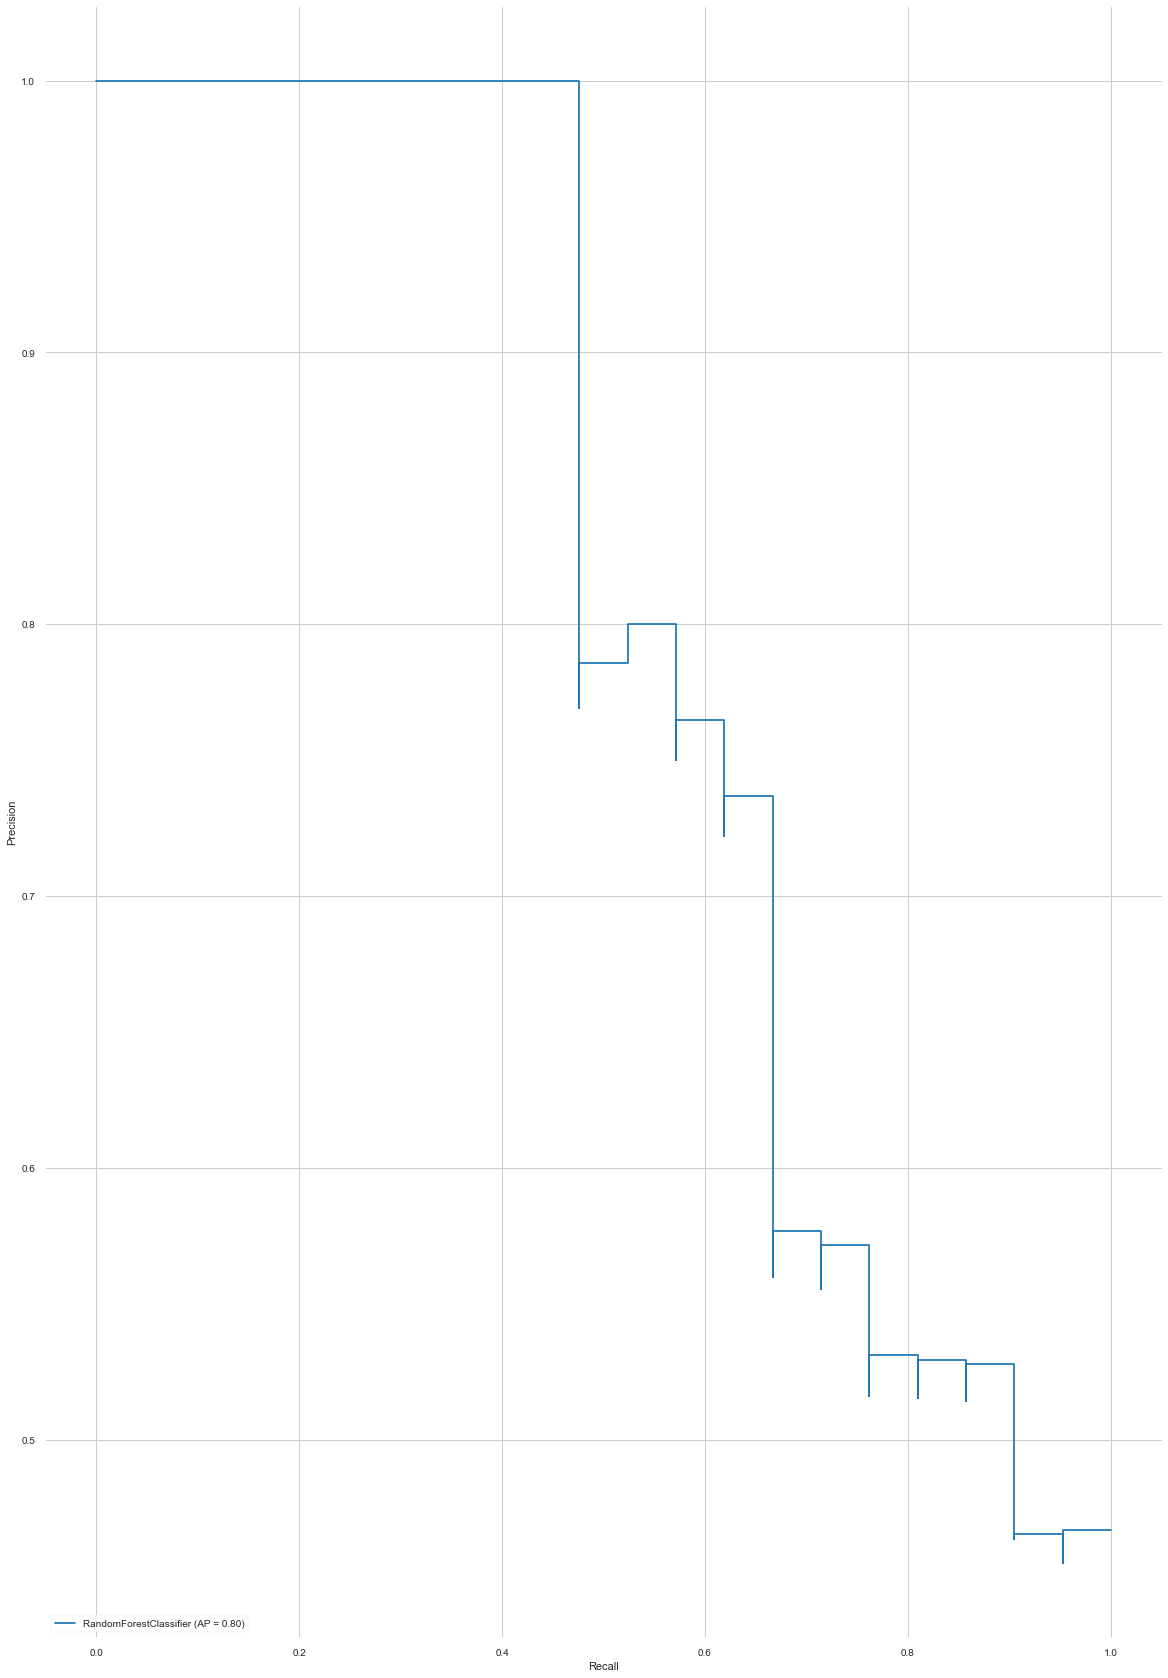

In [298]:
plot_precision_recall_curve(model, X_test, y_test)

### Plotting roc_curve()

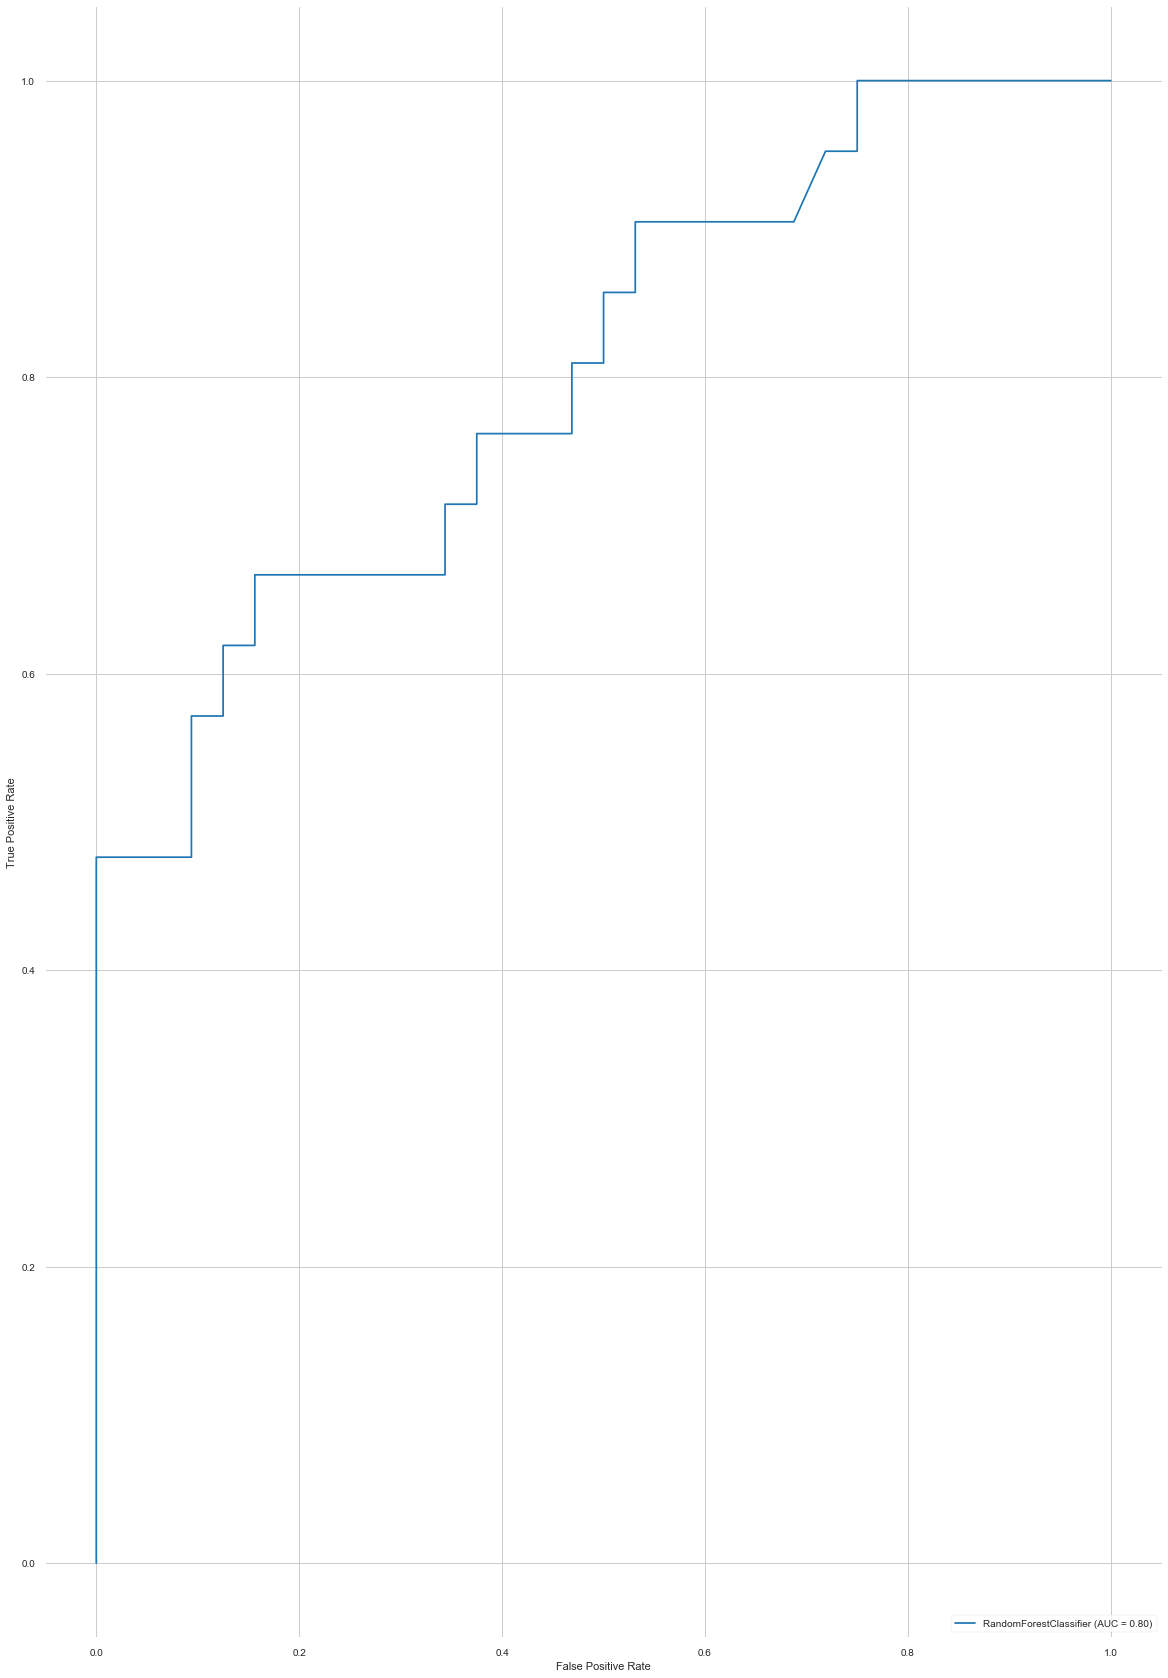

In [299]:
plot_roc_curve(model,X_test,y_test,response_method ='auto')

### K- Fold Technique

In [300]:
from sklearn.model_selection import cross_val_score # instead of train_test_split
scores = cross_val_score(model,X,y,cv=10,scoring='accuracy') # cv means k-fold
#scores = cross_val_score(model,X,y,cv=5,scoring='accuracy') # cv means k-fold
print(scores)
print("Average Accuracy:",scores.mean())
print("Std :",scores.std())

[0.83333333 0.72222222 0.72222222 1.         0.83333333 0.77777778
 0.82352941 0.76470588 0.70588235 0.88235294]
Average Accuracy: 0.8065359477124183
Std : 0.08475085548630301


In [301]:
model=RandomForestClassifier()#max_features='auto',max_depth=700,n_estimators=800,min_samples_split=3,random_state=5)
model.fit(X,y)
y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict))

1.0


In [302]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 1.000000
Accuracy on test set: 1.000000


In [303]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,32,0
1,0,21


In [304]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        21

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



### NOTE : After k-fold,
The Accuracy achieved is 100 % for both Train & Test Dataset. Recall, Precision & f1-score are also 100 %

### Model Evaluation

In [305]:
f1_score(y_test,y_predict)

1.0

In [306]:
roc_auc_score(y_test,y_predict)

1.0

In [307]:
roc_curve(y_test,y_predict)

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

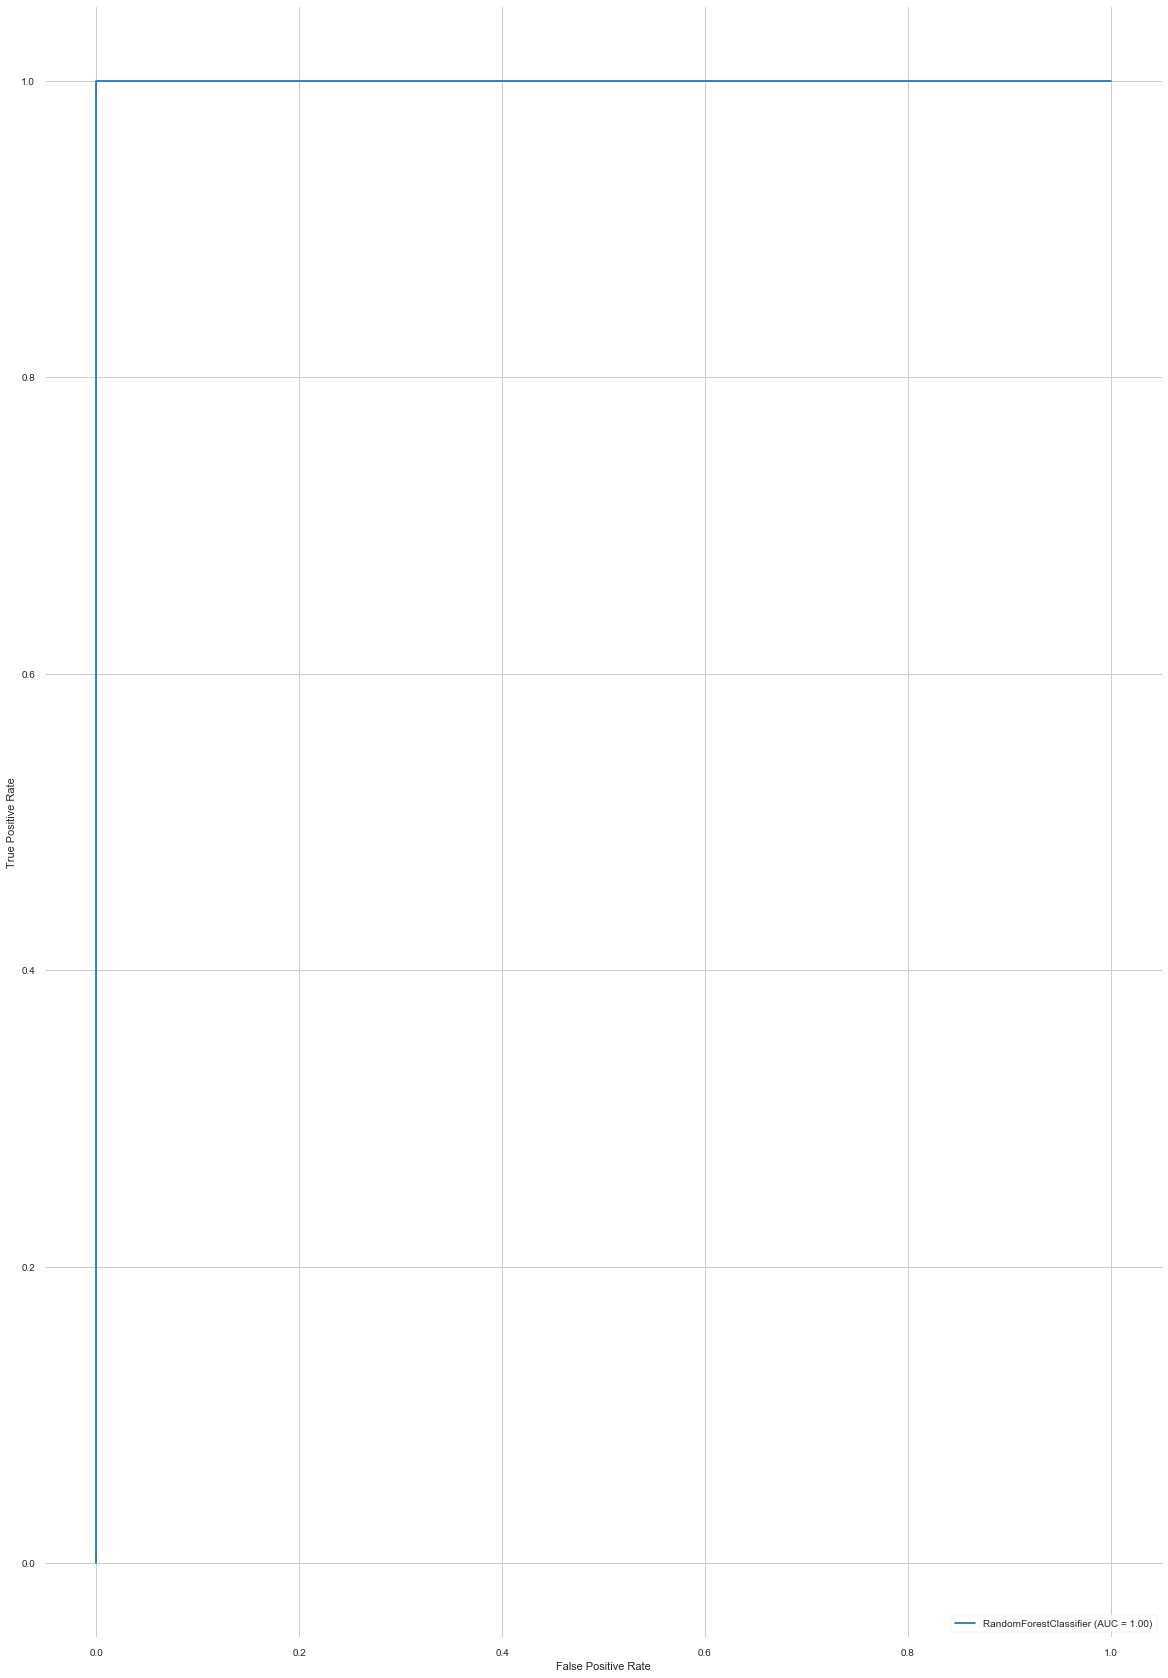

In [308]:
plot_roc_curve(model,X_test,y_test,response_method ='auto')

In [309]:
precision_recall_curve(y_test,y_predict)

(array([1., 1.]), array([1., 0.]), array([1], dtype=int64))

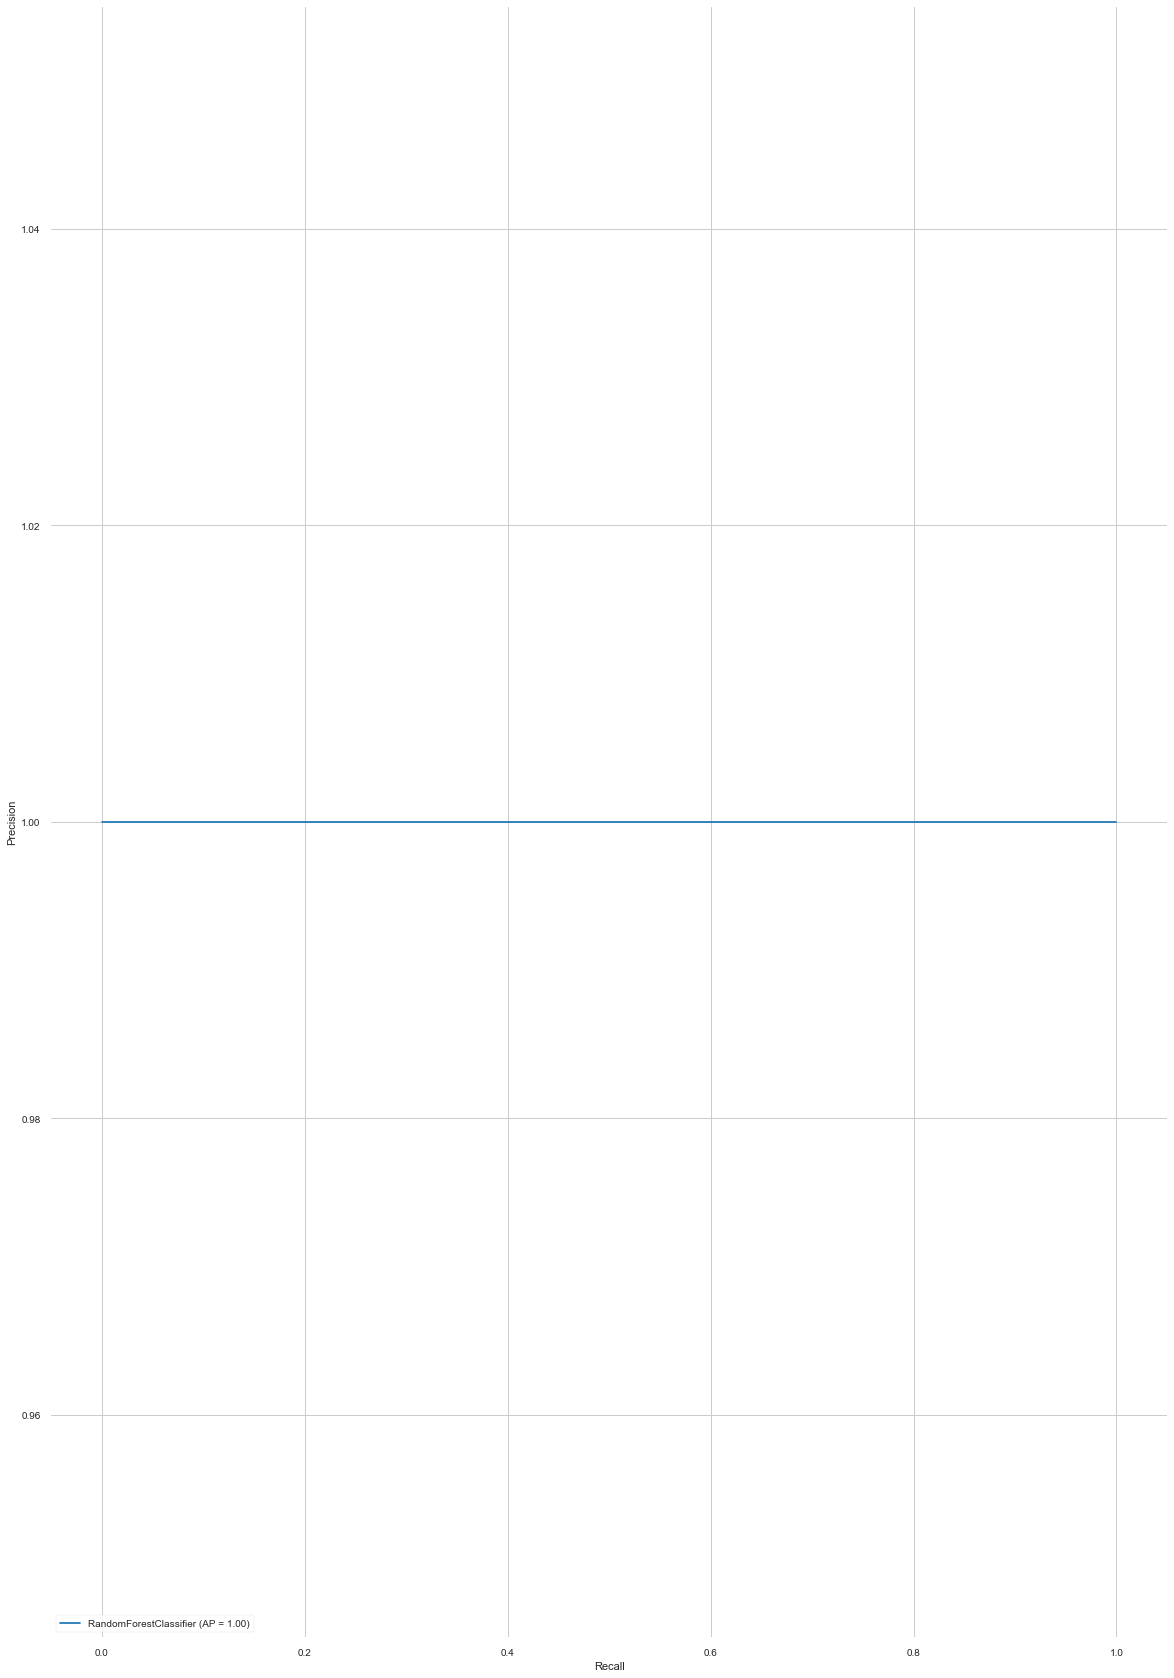

In [310]:
plot_precision_recall_curve(model, X_test, y_test)

### 3. Model Using XGBoost Classifier

In [311]:
X=heart_disease_final.iloc[:,:-1]
y=heart_disease_final.heart_disease_present

In [312]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [351]:
from xgboost import XGBClassifier

model=XGBClassifier(booster='gbtree',eta=0.3,min_child_weight=5,n_estimators=500,
                    max_leaf_nodes=1000,colsample_bytree=1,learning_rate=0.3,max_delta_step=15,reg_lambda=5,reg_alpha=0.2)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=15, max_depth=6,
              max_leaf_nodes=1000, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0.2, reg_lambda=5, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [352]:
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8301886792452831

In [353]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,30,2
1,7,14


In [354]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.926829
Accuracy on test set: 0.830189


### 4. Model Using SVM Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

Support Vector Classifier
This classifier aims at forming a hyperplane that can separate the classes as much as possible by adjusting the distance between the data points and the hyperplane. There are several kernels based on which the hyperplane is decided. I tried four kernels namely, linear, poly, rbf, and sigmoid.

In [317]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

I'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

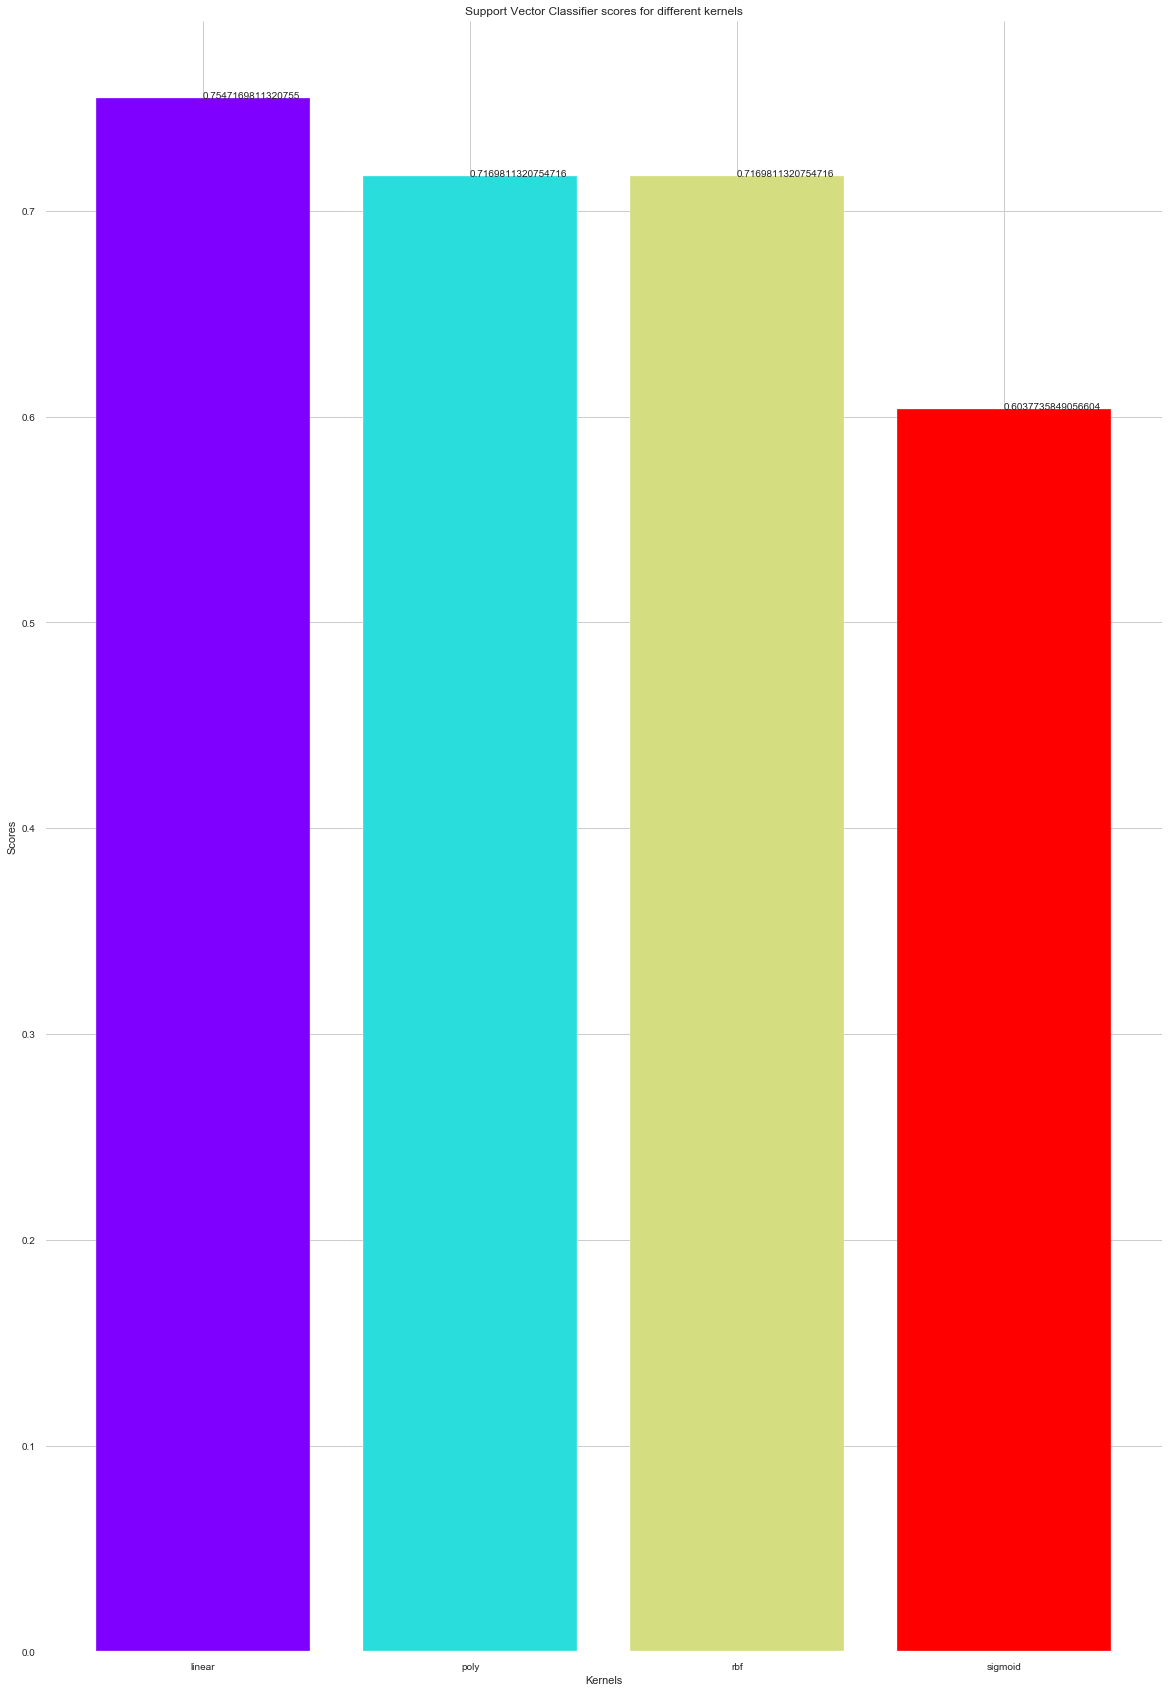

In [318]:
from matplotlib.cm import rainbow
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The linear kernel performed the best, being slightly better than rbf kernel.

In [356]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 75.47169811320755% with linear kernel.


The score for Support Vector Classifier is 75.0% with linear kernel.

In [320]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.926829
Accuracy on test set: 0.830189


In [321]:
from collections import Counter

from sklearn.svm import SVC

#model = SVC(kernel='rbf',C = 0.5 ,gamma = 1)  # C : 1 to 1000, GAMMA : 0.01 to 10
#model = SVC()
#model = SVC(kernel='rbf')
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)   
print(accuracy_score( y_test,y_predict)) 

0.7547169811320755


In [322]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.869919
Accuracy on test set: 0.754717


In [323]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 32, 1: 21})


col_0,0,1
heart_disease_present,,
0,27,5
1,8,13


### Grid Search Cross Validation 


In [324]:
parameters = { 'kernel':['rbf','linear'],
              'C' : [1,10,100,500],
              'gamma' : [0.01,0.1,0.5,1.2]}

parameters

{'kernel': ['rbf', 'linear'],
 'C': [1, 10, 100, 500],
 'gamma': [0.01, 0.1, 0.5, 1.2]}

In [325]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(SVC(),parameters,verbose = 2)
grid_model

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 500], 'gamma': [0.01, 0.1, 0.5, 1.2],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [326]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 500], 'gamma': [0.01, 0.1, 0.5, 1.2],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [327]:
grid_model.best_score_

0.7956666666666667

In [328]:
grid_model.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [329]:
grid_model.best_index_

1

### NOTE : After applying Grid Search Cross Validation, the Accuracy of SVM has increased to 79.56 %

### 5. Model Using ANN Classifier

In [330]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier() 
model.fit(X_train,y_train)
y_predict = model.predict(X_test)   
print(accuracy_score( y_test,y_predict)) 

0.8301886792452831


In [331]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 32, 1: 21})


col_0,0,1
heart_disease_present,,
0,30,2
1,7,14


In [332]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.869919
Accuracy on test set: 0.830189


In [333]:
mod = MLPClassifier(random_state=10,
                     hidden_layer_sizes= (100,100,100,200,2),
                     max_iter= 600)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)   
print(accuracy_score( y_test,y_predict)) 

0.6415094339622641


In [334]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 32, 1: 21})


col_0,0,1
heart_disease_present,,
0,22,10
1,9,12


### NOTE : After tuning the parameters, the accuracy has been reduced, in ANN Model

### 6. Model Using KNN Classifier
The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.


I have the scores for different neighbor values in the array knn_scores(1,21). 

In [335]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    knn_scores.append(model.score(X_test, y_test))

In [336]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[11]*100, [12]))

The score for K Neighbors Classifier is 71.69811320754717% with [12] nieghbors.


The score for K Neighbors Classifier is 71.69811320754717% with [12] nieghbors.

I'll now plot it and see for which value of K did I get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

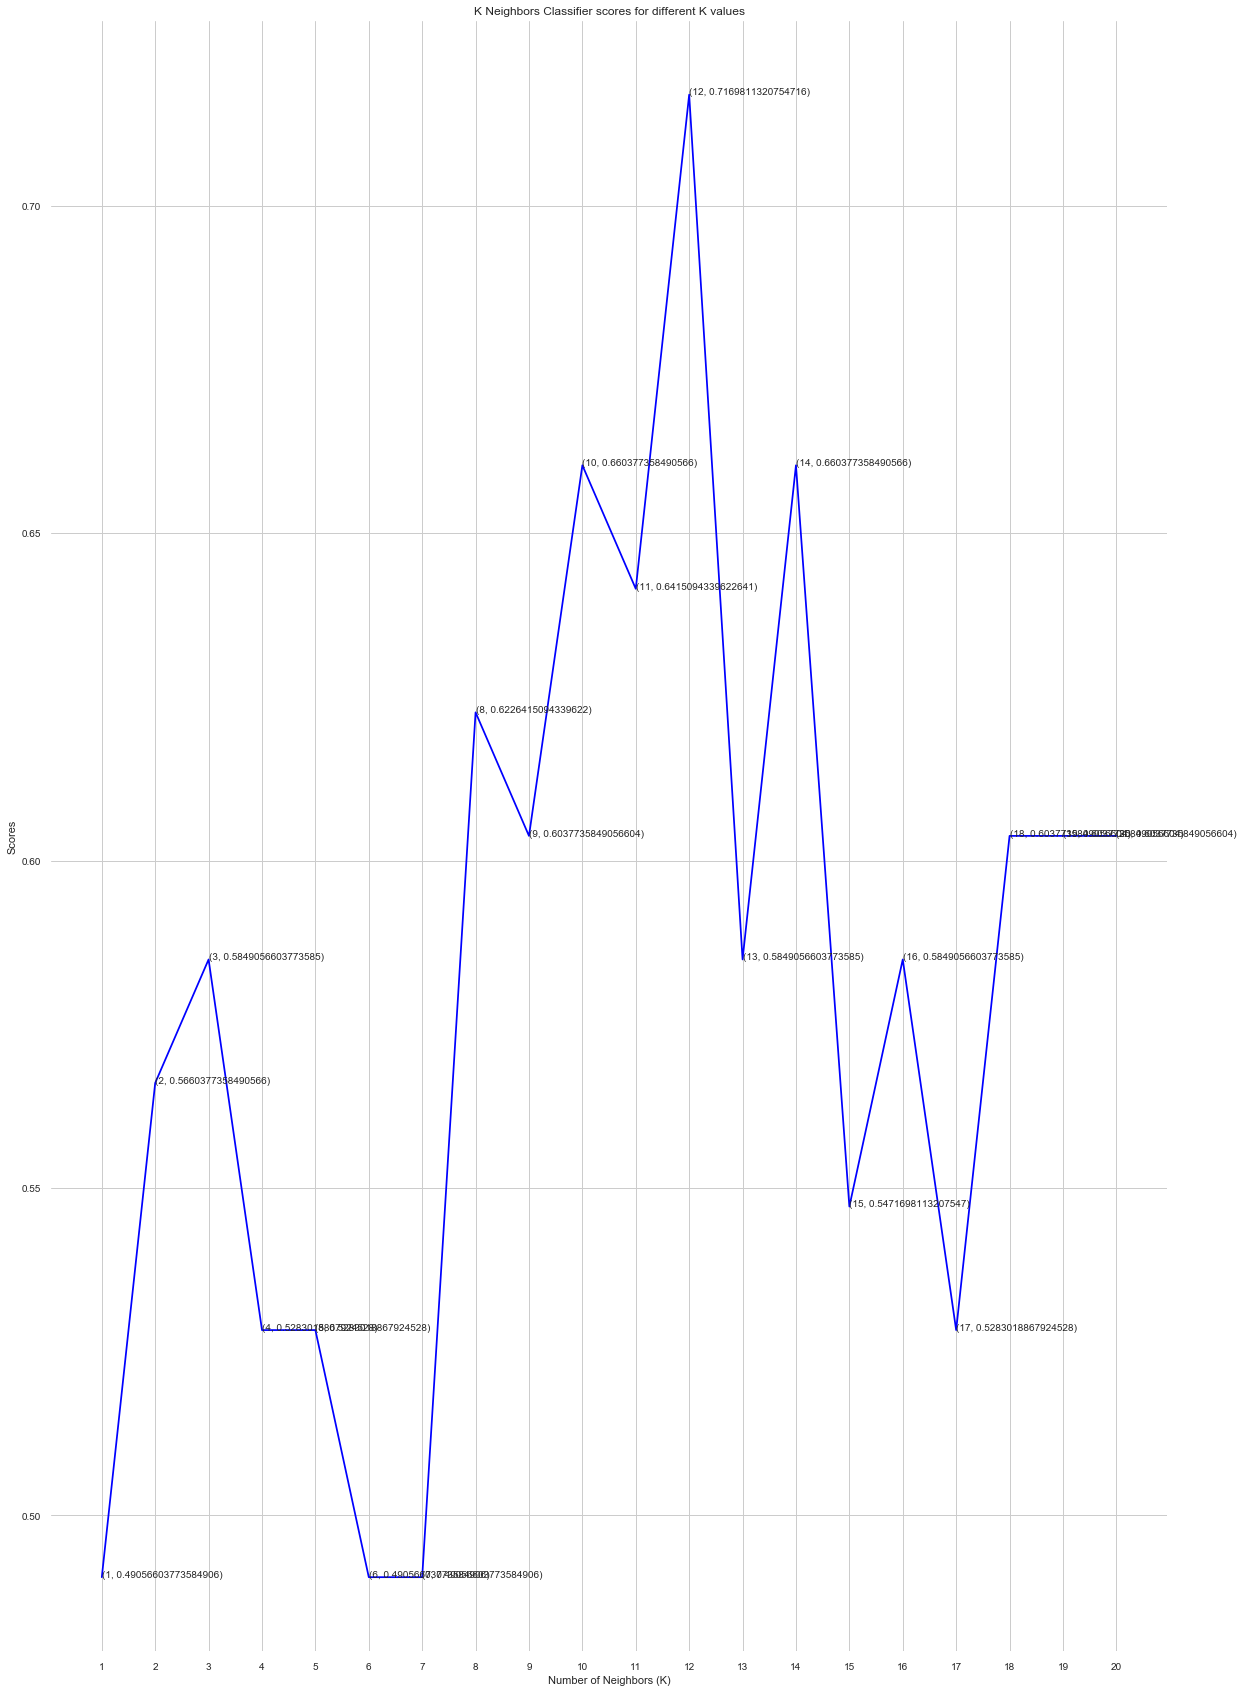

In [368]:
rcParams['figure.figsize'] = 20,30
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [338]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[11]*100, [12]))

The score for K Neighbors Classifier is 71.69811320754717% with [12] nieghbors.


### NOTE : The score for K Neighbors Classifier is 71.69811320754717% with [12] nieghbors.

### Conclusion 
The project involved analysis of the heart disease patient dataset with proper data processing. Then, 6 models were trained and tested with maximum scores as follows:
- Logistic Regression: 83%
- Random Forest Classifier: 100%
- XGBoost Classifier: 83%
- Support Vector Machine Classifier: 79.56 %
- Artificial Neural Network Classifier: 83 %
- K Neighbors Classifier: 71.69%

Random Forest Classifier scored the best score of 100%.



### End of Project